In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Librerias

In [ ]:
 from astropy.io import fits

In [ ]:
%matplotlib inline


In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [ ]:
import numpy as np
from numpy import nan
import pandas as pd
from scipy import interpolate
import io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pywt

from astropy.io import ascii
import os

import json


In [ ]:
pd.set_option('display.max_columns',30)

# Montar google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

# Carga de json con los espectros

In [ ]:
directorio = 'BD_espectros_sample/'
nom_fichero = 'datos_obj_espectros.json'
df_obj_espectros_raw = pd.read_json(directorio+nom_fichero)
df_obj_espectros_raw

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6
3,spec-1803-54152-0200.fits,"[-0.5595631599, 1.6141862868999999, -0.4718873...","[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",1803,54152,200,2030052577277667328,0.000217,good,STAR,M2V
4,spec-1955-53442-0499.fits,"[-0.4254819751, 0.28042450550000003, 1.2131350...","[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",1955,53442,499,2201271539700099072,-0.000042,marginal,STAR,M2V
...,...,...,...,...,...,...,...,...,...,...,...
3491,spec-0885-52379-0137.fits,"[0.6488318443000001, 1.1210706234, 0.755453825...","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",885,52379,137,996459115741997056,-0.000392,good,STAR,M3
3492,spec-0712-52199-0221.fits,"[3.8596711159, 2.1484868526, -2.7742624283, 0....","[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",712,52199,221,801701518582507520,0.000100,good,STAR,M2
3493,spec-0730-52466-0251.fits,"[1.093152523, 1.5214309691999999, 2.8724341393...","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",730,52466,251,821975967722399744,-0.000098,good,STAR,M2
3494,spec-0707-52177-0095.fits,"[-0.6275257468000001, -0.2927546501, -1.621553...","[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",707,52177,95,796037384062920704,-0.000013,good,STAR,M8


In [ ]:
df_obj_espectros_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 0 to 3495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  3496 non-null   object 
 1   flujo            3496 non-null   object 
 2   long_A           3496 non-null   object 
 3   PLATE            3496 non-null   int64  
 4   MJD              3496 non-null   int64  
 5   FIBERID          3496 non-null   int64  
 6   SPECOBJID        3496 non-null   int64  
 7   Z                3496 non-null   float64
 8   PLATEQUALITY     3496 non-null   object 
 9   CLASS            3496 non-null   object 
 10  SUBCLASS         3496 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 327.8+ KB


Vemos que no hay nulos.

Cargamos las plantillas con los espectros de las subenanas

In [ ]:
directorio = 'Plantillas/'
nom_fichero = 'espectros_plantillas.json'
df_espec_platillas = pd.read_json(directorio+nom_fichero)
df_espec_platillas.head(3)

,flujo,long_A,clase_metalicidad
0,"[0.3998440802, 0.3969808519, 0.3941309154, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm0
1,"[0.3611840904, 0.3597990274, 0.3584717214, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm1
2,"[0.3468220234, 0.3459565341, 0.3451767564, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm2


In [ ]:
df_espec_platillas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   flujo              30 non-null     object
 1   long_A             30 non-null     object
 2   clase_metalicidad  30 non-null     object
dtypes: object(3)
memory usage: 960.0+ bytes


# Carga información EM en csv

In [ ]:
directorio = 'BD_espectros_sample/'
df_info_espectros = pd.read_csv(directorio+'datos_SDSS_objetos.csv', index_col= False, encoding='utf-8')
df_info_espectros

In [ ]:
df_info_espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #plate       3496 non-null   int64  
 1   mjd          3496 non-null   int64  
 2   fiberid      3496 non-null   int64  
 3   run2d        3496 non-null   object 
 4   specobj_id   3496 non-null   object 
 5   ra           3496 non-null   object 
 6   dec          3496 non-null   object 
 7   sn_median_r  3496 non-null   float64
 8   z            3496 non-null   float64
 9   zerr         3496 non-null   float64
 10  zwarning     3496 non-null   int64  
 11  class        3496 non-null   object 
 12  subclass     3496 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 355.2+ KB


Para evitar tener problema con los nombres de las columnas al integrar los vamos a cambiar.

In [ ]:
df_info_espectros.columns = list(map(lambda x: x+'2', df_info_espectros.columns))
df_info_espectros.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'specobj_id2', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'],
      dtype='object')

Convertimos specobj_id2 a numerico.

In [ ]:
df_info_espectros['specobj_id2'] = df_info_espectros['specobj_id2'].apply(lambda x: pd.to_numeric(x[1:-1]))

In [ ]:
df_info_espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #plate2       3496 non-null   int64  
 1   mjd2          3496 non-null   int64  
 2   fiberid2      3496 non-null   int64  
 3   run2d2        3496 non-null   object 
 4   specobj_id2   3496 non-null   int64  
 5   ra2           3496 non-null   object 
 6   dec2          3496 non-null   object 
 7   sn_median_r2  3496 non-null   float64
 8   z2            3496 non-null   float64
 9   zerr2         3496 non-null   float64
 10  zwarning2     3496 non-null   int64  
 11  class2        3496 non-null   object 
 12  subclass2     3496 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 355.2+ KB


# Revisión metadatos

## Definición de funciones

Definiremos una función para obtener los metadatos, otra para los histogramas y otra para representar la distribución de las variables categoricas.

In [ ]:
def descripcionDatosDataset(datos,longitud =5): #longitud es el número de valores más repetidos a mostrar
                  
    numericas=[]
    nominales=[]
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    print('Columnas: ', datos.columns)
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])#es un diccionario
            cantidadNulos = datos[columna].isna().sum()
            numericas.append(columna)
            
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            lista = [x for x in datos[columna].unique() if str(x) != 'nan'] #quitamos los nulos de la lista de valores únicos
            valoresDescripcion = {'numeroValoresUnicos' : len(lista),
                                  'valoresPresentes' : lista[:10], 
                                  'cantidadNulos' : datos[columna].isna().sum(),
                                  'conteoValores' : pd.value_counts(datos[columna]).sort_values(ascending=False)}
            #si la longitud de lista es menor que el parámetro longitud se mostrarán todos los elementos
            funLongitudMinima = lambda x: len(x) if len(x) < longitud else longitud
            n_datos_a_mostrar = funLongitudMinima(lista)#si nº elementos lista mayor que longitud toma el valor longitud 
            nominales.append(columna)
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        
        if tipo == 'numérico':
            print(valoresDescripcion,'\n')
            pctNulos = cantidadNulos / datos.shape[0] * 100
            print('-- Cantidad de nulos: ' + str(cantidadNulos) + ' = ' + "{0:.2f}".format(pctNulos) + '%')            
        else:
            print('-- Numero valores unicos: ' + str(valoresDescripcion['numeroValoresUnicos'])),
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
            print('-- Distribucion valores mas repetidos ( '+str(n_datos_a_mostrar)+ ' primeros) :\n', valoresDescripcion['conteoValores'][:n_datos_a_mostrar])
        print('-'*100)
    return numericas, nominales

In [ ]:
def plot_numericos(dataset, lista_num, largo = 16, alto = 20): #list_num es la lista con los atributos numéricos
  print(lista_num)
  df_plot = dataset[lista_num]
  IQR = df_plot.quantile(0.75)- df_plot.quantile(0.25)
  df_plot = df_plot[(df_plot>df_plot.quantile(0.25)-5*IQR)&
                      (df_plot<df_plot.quantile(0.75)+5*IQR)] #quitamos valores extremos para mejorar visualización
  plt.style.use('ggplot')
  df_plot.hist(figsize=(largo,alto),bins=30,color='purple',edgecolor='black')

In [ ]:
def plot_categoria(dataset, atributo): #atributo es la lista con los atributos no numéricos
  df_plot = dataset[atributo]
  ax = df_plot.value_counts().plot.bar(figsize=(6,8),color='orange',edgecolor='black')
  ax.set_title('Distribución por '+ atributo, size=12)
  ax.set_xlabel(atributo, size=10)
  ax.set_ylabel('Frecuencia', size=10)
  plt.show()


## Metadatos plantillas

Revisamos los datos.

In [ ]:
df_espec_platillas.columns

Index(['flujo', 'long_A', 'clase_metalicidad'], dtype='object')

In [ ]:
descripcionDatosDataset(df_espec_platillas[['clase_metalicidad']],0)

Cantidad de filas: 30
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['clase_metalicidad'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: clase_metalicidad
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 30
-- Valores presentes (10 primeros): ['usdm0', 'usdm1', 'usdm2', 'usdm3', 'usdm4', 'usdm5', 'usdm6', 'usdm7', 'usdm8', 'usdm9']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 0 primeros) :
 Series([], Name: clase_metalicidad, dtype: int64)
----------------------------------------------------------------------------------------------------


([], ['clase_metalicidad'])

Hay una tupla por cada clase de metalicidad

In [ ]:
print(f"clases de metalicidad {df_espec_platillas.clase_metalicidad.unique()}")

clases de metalicidad ['usdm0' 'usdm1' 'usdm2' 'usdm3' 'usdm4' 'usdm5' 'usdm6' 'usdm7' 'usdm8'
 'usdm9' 'esdm0' 'esdm1' 'esdm2' 'esdm3' 'esdm4' 'esdm5' 'esdm6' 'esdm7'
 'esdm8' 'esdm9' 'sdm0' 'sdm1' 'sdm2' 'sdm3' 'sdm4' 'sdm5' 'sdm6' 'sdm7'
 'sdm8' 'sdm9']


### Revisión de los espectros de las plantillas

Revisamos primero longitudes de onda y los flujos. Dicha información se ha guardado como objeto lista dentro del dataframe.

In [ ]:
flujos = df_espec_platillas['flujo']
flujos

0     [0.3998440802, 0.3969808519, 0.3941309154, 0.3...
1     [0.3611840904, 0.3597990274, 0.3584717214, 0.3...
2     [0.3468220234, 0.3459565341, 0.3451767564, 0.3...
3     [0.3326164484, 0.3334602714, 0.3342262506, 0.3...
4     [0.2566303313, 0.2506335974, 0.244899198400000...
5     [0.27648752930000003, 0.278170079, 0.280117690...
6     [0.2835782766, 0.2850551009, 0.28632617, 0.287...
7     [0.1269703656, 0.1223803312, 0.118335038400000...
8     [0.0651824921, 0.0654907376, 0.0657525063, 0.0...
9     [-0.0433673523, -0.0347368494, -0.0256114528, ...
10    [0.4231421053, 0.4214060307, 0.4194532335, 0.4...
11    [0.3599558473, 0.357961297, 0.3559896052, 0.35...
12    [0.34615087510000003, 0.344283402, 0.342443198...
13    [0.312651962, 0.3131365776, 0.3137286305, 0.31...
14    [0.2640294731, 0.2635650039, 0.263253301400000...
15    [0.24482573570000002, 0.2446406335, 0.24433082...
16    [0.18957602980000002, 0.1917598695, 0.19364845...
17    [0.2064069957, 0.20552200080000002, 0.2042

In [ ]:
longitudes_onda = df_espec_platillas['long_A']
longitudes_onda

0     [5000.0, 5000.0581054688, 5000.1166992188, 500...
1     [5000.0, 5000.0581054688, 5000.1166992188, 500...
2     [5000.0, 5000.0581054688, 5000.1166992188, 500...
3     [5000.0, 5000.0581054688, 5000.1166992188, 500...
4     [5000.0, 5000.0581054688, 5000.1166992188, 500...
5     [5000.0, 5000.0581054688, 5000.1166992188, 500...
6     [5000.0, 5000.0581054688, 5000.1166992188, 500...
7     [5000.0, 5000.0581054688, 5000.1166992188, 500...
8     [5000.0, 5000.0581054688, 5000.1166992188, 500...
9     [5000.0, 5000.0581054688, 5000.1166992188, 500...
10    [5000.0, 5000.0581054688, 5000.1166992188, 500...
11    [5000.0, 5000.0581054688, 5000.1166992188, 500...
12    [5000.0, 5000.0581054688, 5000.1166992188, 500...
13    [5000.0, 5000.0581054688, 5000.1166992188, 500...
14    [5000.0, 5000.0581054688, 5000.1166992188, 500...
15    [5000.0, 5000.0581054688, 5000.1166992188, 500...
16    [5000.0, 5000.0581054688, 5000.1166992188, 500...
17    [5000.0, 5000.0581054688, 5000.1166992188,

La base de longitudes de onda es la misma para todas las plantillas.

Analizamos los las longitudes de onda

In [ ]:
n_long_onda = np.asarray([len(x) for x in longitudes_onda])
print(f'numero máximo de longitudes de onda contenidas en un espectro {n_long_onda.max()}, numero mínimo {n_long_onda.min()}')

numero máximo de longitudes de onda contenidas en un espectro 60000, numero mínimo 60000


Verificamos cuál es la longitud del intervalo entre longitudes de onda.

In [ ]:
lenth_w = np.asarray([np.asarray(x) for x in longitudes_onda])
separacion = []

for lo in lenth_w:
  lw_shift= lo[1:]
  lw = lo[:-1]
  separacion.append(lw_shift-lw)
separacion = np.asarray(separacion).ravel()
separacion.shape

(1799970,)

In [ ]:
print(f"maxima separación {max(separacion)}, mínima separación {min(separacion)}")

maxima separación 0.05859375, mínima separación 0.0576171875


La separación entre la longitudes de onda practicamente es la misma. 

Respecto a los rangos tenemos:


In [ ]:
rangos = np.asarray([np.asarray([min(x), max(x)]) for x in longitudes_onda])
rangos.shape

(30, 2)

In [ ]:
print(f" menor longitud de onda  inferior {rangos[:,0].min()}, mayor longitud de onda inferior {rangos[:,0].max()},\
      menor  superior {rangos[:,1].min()}, mayor  superior {rangos[:,1].max()}")

 menor longitud de onda  inferior 5000.0, mayor longitud de onda inferior 5000.0,      menor  superior 8499.8828125, mayor  superior 8499.8828125


los rangos de longitudes de onda son los mismos y van desde los 5000 Armstrong hasta las 8499.88. 

## Metadatos espectros subenanas SDSS

In [ ]:
df_obj_espectros_raw.columns

Index(['nom_fichero_fit', 'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID',
       'SPECOBJID', 'Z', 'PLATEQUALITY', 'CLASS', 'SUBCLASS'],
      dtype='object')

In [ ]:
n_registros=20 #variable que nos indica el número de valores más repetidos a mostrar
atrib_num, atrib_nom = descripcionDatosDataset(df_obj_espectros_raw[['Z', 'PLATEQUALITY', 'CLASS', 'SUBCLASS']],n_registros)

Cantidad de filas: 3496
Cantidad de columnas: 4
----------------------------------------------------------------------------------------------------
Columnas:  Index(['Z', 'PLATEQUALITY', 'CLASS', 'SUBCLASS'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: Z
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: Z, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3
-- Valores presentes (10 primeros): ['good', 'marginal', 'bad']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 good        2348
marginal    1034
bad          114
Name: PLATEQUALITY, dtype: int64
----------------------------

['Z']


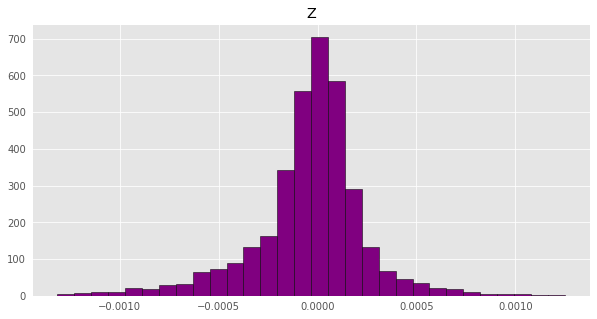

In [ ]:
plot_numericos(df_obj_espectros_raw, atrib_num,largo = 10, alto = 5)

atri_nom

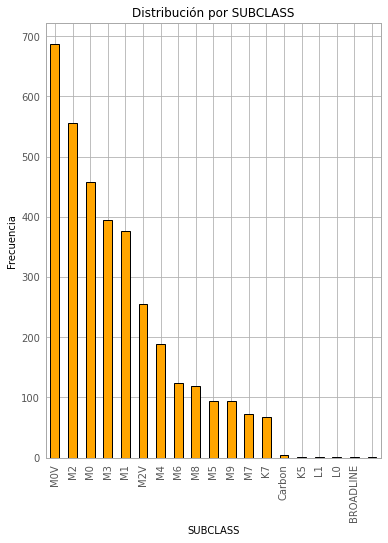

In [ ]:
plot_categoria(df_obj_espectros_raw, 'SUBCLASS')

### Revisión de los espectros

Revisamos primero longitudes de onda y los flujos. Dicha información se ha guardado como objeto lista dentro del dataframe.

In [ ]:
flujos = df_obj_espectros_raw['flujo']
flujos

0       [0.35031041500000004, -0.1485088319, 0.0116492...
1       [-0.6632891893, 2.39052701, -5.435426712, 1.57...
2       [-0.4185376167, 0.1414910257, -0.6999538541, 0...
3       [-0.5595631599, 1.6141862868999999, -0.4718873...
4       [-0.4254819751, 0.28042450550000003, 1.2131350...
                              ...                        
3491    [0.6488318443000001, 1.1210706234, 0.755453825...
3492    [3.8596711159, 2.1484868526, -2.7742624283, 0....
3493    [1.093152523, 1.5214309691999999, 2.8724341393...
3494    [-0.6275257468000001, -0.2927546501, -1.621553...
3495    [-0.6982907057000001, 1.2785845995, 0.89575284...
Name: flujo, Length: 3496, dtype: object

En principio no haremos nada ya que filtraremos para quitar ruido y normalizaremos

In [ ]:
longitudes_onda = df_obj_espectros_raw['long_A']
longitudes_onda

0       [3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....
1       [3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....
2       [3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....
3       [3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....
4       [3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....
                              ...                        
3491    [3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....
3492    [3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....
3493    [3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....
3494    [3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....
3495    [3815.9, 3816.8, 3817.7, 3818.6, 3819.4, 3820....
Name: long_A, Length: 3496, dtype: object

El primer detalle que observamos es que para espectro los flujos corresponden a frecuencias distintas.

Analizamos los las longitudes de onda para cada espectro

In [ ]:
n_long_onda = np.asarray([len(x) for x in longitudes_onda])
print(f'numero máximo de longitudes de onda contenidas en un espectro {n_long_onda.max()}, numero mínimo {n_long_onda.min()}')

numero máximo de longitudes de onda contenidas en un espectro 3860, numero mínimo 3094


Vemos que no coinciden el número de longitudes de onda que contiene cada espectro

Analicemos un espectro cualquiera para ver la separación entre las longitudes de onda.

In [ ]:
lenth_w = [np.asarray(x) for x in longitudes_onda]
separacion =np.empty([1,2])

for lo in lenth_w:
  lw_shift= lo[1:]
  lw = lo[:-1]
  lw_shift-lw
  separacion = np.concatenate([separacion, np.asarray([(lw_shift-lw).min(),(lw_shift-lw).max()]).reshape(-1,2)], axis=0)
separacion.shape

(3497, 2)

In [ ]:
print(f"maxima separación {separacion[:,1].max()}, mínima separación {separacion[:,0].min()}")

maxima separación 2.2000000000007276, mínima separación 0.7999999999997272


Podemos observar que conforme aumenta la longitud de onda aumenta la separación entre longitudes de onda (REVISAR RESOLUCION DEL ESPECTRO)

In [ ]:
lw_shift-lw

array([0.9, 0.9, 0.9, ..., 2.1, 2.2, 2.1])

Respecto a los rangos tenemos:


In [ ]:
print(f" menor longitud de onda  inferior {rangos[:,0].min()}, mayor longitud de onda inferior {rangos[:,0].max()},\
      menor  superior {rangos[:,1].min()}, mayor  superior {rangos[:,1].max()}")

 menor longitud de onda  inferior 3783.6, mayor longitud de onda inferior 4507.1,      menor  superior 8100.3, mayor  superior 9255.5


Habíamos visto que las plantillas van desde los 5000 Armstrong hasta las 8500. Luego tenemos espectros que no cubren ese rango por las altas longitudes de onda.

Vemos en cuantos espectros no tenemos información para los 8500 A.

In [ ]:
df_longitudes_onda=df_obj_espectros_raw[['long_A']]

In [ ]:
df_longitudes_onda['max_long_A']=df_longitudes_onda['long_A'].apply(lambda x: max(list(x)))
df_longitudes_onda

,long_A,max_long_A
0,"[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",9210.9
1,"[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",9204.5
2,"[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",9187.6
3,"[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",9185.4
4,"[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",9208.7
...,...,...
3491,"[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",9200.3
3492,"[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",9191.8
3493,"[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",9193.9
3494,"[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",9189.7


Veamos cuantos espectros no llegan a los 8500 Armstrongs

In [ ]:
index_long_menor_8500 = (df_longitudes_onda['max_long_A']<8500)
print(f"numero de espectros sin flujos para longitudes de onda iguales o mayores de 8500  {index_long_menor_8500.sum()}")

numero de espectros sin flujos para longitudes de onda iguales o mayores de 8500  2


Añadimos al dataset la máxima longitud de onda.

In [ ]:
df_obj_espectros_raw['max_long_A']= df_longitudes_onda.max_long_A

In [ ]:
df_obj_espectros_raw.head(3)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS,max_long_A
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2,9210.9
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V,9204.5
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6,9187.6


## Metadatos información EM fichero csv

In [ ]:
df_info_espectros.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'specobj_id2', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'],
      dtype='object')

Analizaremos los metadatos de aquella información que nos interesa.

In [ ]:
n_registros=20 #variable que nos indica el número de valores más repetidos a mostrar
atrib_num, atrib_nom = descripcionDatosDataset(df_info_espectros[['sn_median_r2', 'z2', 'zerr2', 'zwarning2','class2', 'subclass2']],n_registros)

Cantidad de filas: 3496
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columnas:  Index(['sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: sn_median_r2
Tipo de datos: numérico
Descripción de valores:
min       -0.230000
max       71.210000
mean       8.011467
std        8.533257
median     5.135000
Name: sn_median_r2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: z2
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: z2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------

['sn_median_r2', 'z2', 'zerr2', 'zwarning2']


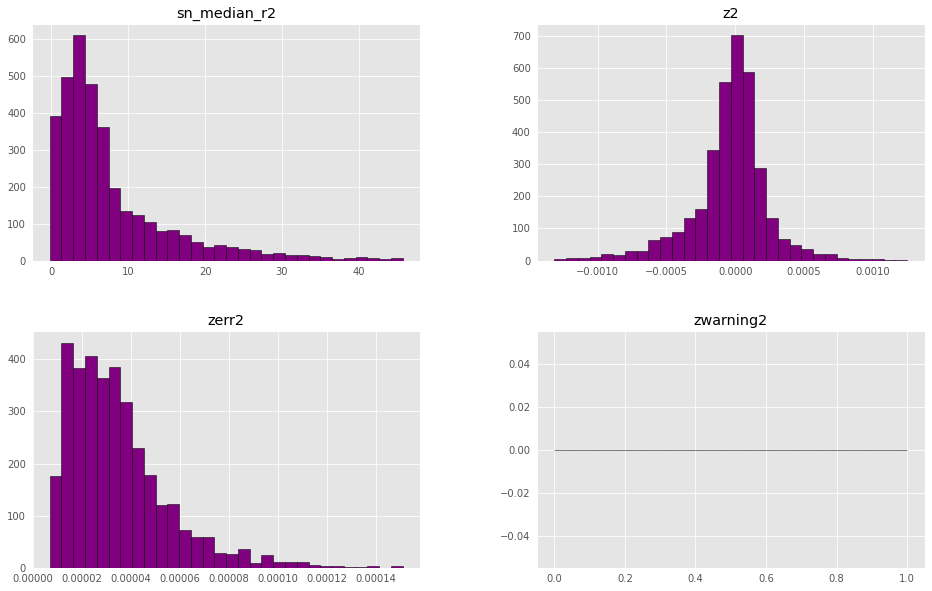

In [ ]:
plot_numericos(df_info_espectros, atrib_num,largo = 16, alto = 10)

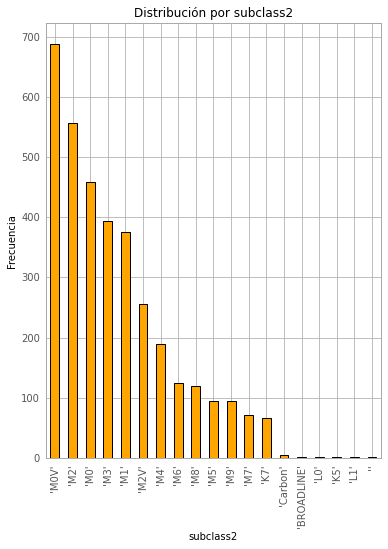

In [ ]:
plot_categoria(df_info_espectros, 'subclass2')

# Calidad de los datos

## df_obj_espectros_raw

### Z

In [ ]:
'''
Columna: Z
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: Z, dtype: float64 
'''

Valores de Z 0.4 no tiene sentido ya que estamos hablando de estrellas cercanas debiendose el corrimiento al rojo debido a los movimientos propios

### Calidad placas

In [ ]:
'''
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3
-- Valores presentes (10 primeros): ['good', 'marginal', 'bad']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 good        2348
marginal    1034
bad          114
Name: PLATEQUALITY, dtype: int64
'''

Vemos hay 114 placas con mala calidad.

### Valores faltantes o nulos en longitudes de onda y flujos.

Ya vimos que la diferencia máxima es de 2. Luego no longitudes de onda faltantes.

Comprobamos si para cada espectro el número de datos de los flujos y el de longitudes de onda es el mismo. 

In [ ]:
dif_long_flujos = df_obj_espectros_raw[['long_A','flujo']].apply(lambda x: len(x[1])-len(x[0]),axis = 1)


In [ ]:
dif_long_flujos.max()

0

Vemos que no hay problemas

Veamos valores nulos de las longitudes de onda y flujos. Como el número de longitudes de onda cambia de un espectro a otro tendremos que revisar objeto por objeto.

In [ ]:
nulos_espectros = df_obj_espectros_raw['flujo'].apply(lambda x: np.isnan(x).any())
nulos_espectros.sum()

0

In [ ]:
nulos_longitudes = df_obj_espectros_raw['long_A'].apply(lambda x: np.isnan(x).any())
nulos_longitudes.sum()

0

Vemos que no hay valores nulos

Sin embargo hay espectros con datos extrapolados. 

In [ ]:
#504506269357336576
objeto = df_obj_espectros_raw[['flujo','long_A']][df_obj_espectros_raw['SPECOBJID']==504506269357336576]
objeto

,flujo,long_A
3152,"[-1.6008164883, -1.7773344517, -1.216822505, 2...","[3818.6, 3819.4, 3820.3, 3821.2, 3822.1, 3823...."


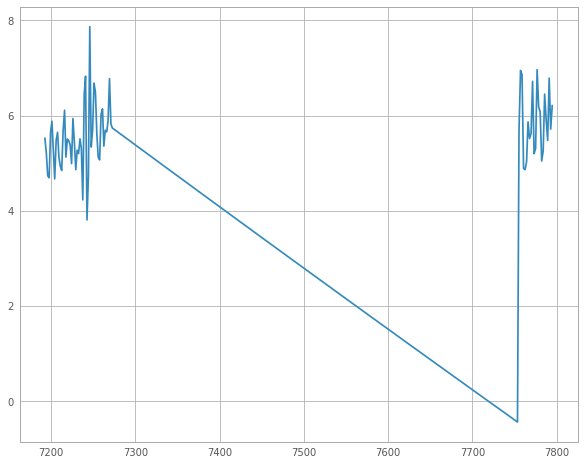

In [ ]:

plt.figure(figsize = (10,8))
x = np.asarray(objeto.iloc[0]['long_A'])[2750:3100]
y = np.asarray(objeto.iloc[0]['flujo'])[2750:3100]

plt.plot(x,y)

#### Busqueda datos extrapolados

Definimos una función par ver si hay extrapolaciones. Lo que hará la función es ver las pendientes entre intervalos consecutivos es la misma. 

In [ ]:
def es_extrapolado(espectro, long_onda, precision, salto, secuencia):
  """
  Muestrea el espectro y calcula  pendiente del espectro entre los puntos
  cuando la pendiente no cambia en número determinado de muestreos devuelve True

  :param : espectro. espectro[0] lista con los flujos, espectro[1] lista con las longitudes de onda
  :param : long_onda. Lista de dos elementos. Rango de  longitudes de onda donde se evaluará si hay interpolación
  :param : precision. Rango de precisión para considerar que dos pendientes son iguales
  :param: salto: número de longitudes de onda usadas para calcular la pendiente.
  :param: secuencia número de veces consecutivas que exigiremos que las pendientes sean iguales para determinar extapolacion.

  :Return: booleano. True si el espectro ha sido extrapolado, False si no
           

  """
  cuenta = 0
  pendiente=0
  long =  np.asarray(espectro[1])
  flujos= np.asarray(espectro[0])
  #seleccionamos los índices que cumplan
  indices = np.where((long>long_onda[0])&(long<long_onda[1]))
  #muestreamos
  flujos= flujos[indices][::salto]
  long =  long[indices][::salto]
  #print(flujos)
  #print(long,'\n')
  dif_flujos = flujos[1:] - flujos[:-1]
  dif_long = long[1:] - long[:-1]
  pendientes = dif_flujos/dif_long


  for i, elem in enumerate(pendientes):
    if np.abs(elem-pendiente)<=precision:
      cuenta+=1
      if cuenta ==secuencia:
        return True
        break
    else:
      cuenta = 0
    pendiente =elem
  return False



Solo miraremos si hay extrapolación en el rango 5000-8500 Armstrong. 

In [ ]:
lista_extrapolado = df_obj_espectros_raw[['flujo','long_A']].apply(es_extrapolado,long_onda=[5000,8500],precision=0.0001,salto = 5,\
                                                                secuencia =6,axis=1)

In [ ]:
lista_extrapolado.sum()

139

Añadimos una columna al dataset con la información de si el expectro ha sido extrapolado

In [ ]:
df_obj_espectros_raw['extrapolado']=lista_extrapolado

Inspeccionamos los expectros extrapolados

In [ ]:
df_extrapolado = df_obj_espectros_raw[['flujo','long_A']][lista_extrapolado].reset_index(drop=True)
df_extrapolado.shape

(139, 2)

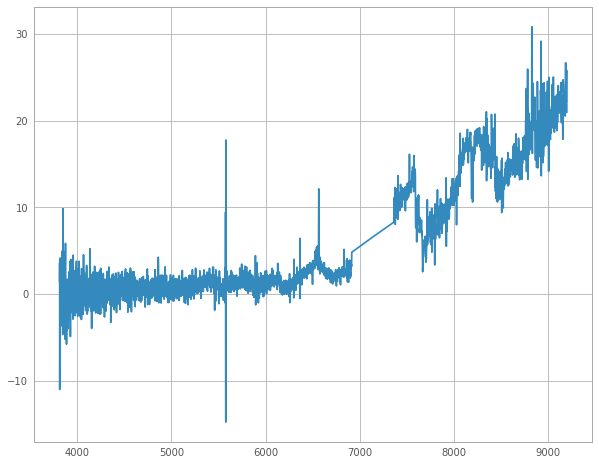

In [ ]:
indice =80
plt.figure(figsize = (10,8))
x = np.asarray(df_extrapolado.loc[indice]['long_A'])
y = np.asarray(df_extrapolado.loc[indice]['flujo'])

plt.plot(x,y)

Vemos así como nos cada la distribución por subclase si quitamos los espectros extrapolados

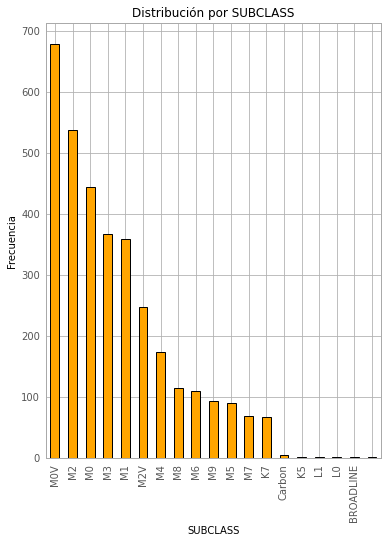

In [ ]:
plot_categoria(df_obj_espectros_raw[~lista_extrapolado], 'SUBCLASS')

Vemos que aún tenemos representación de todas las clases

In [ ]:
extrapolado

True

In [ ]:
def extrapolados

## df_info_espectros

Teníamos los siguientes metadatos.

In [ ]:
'''
Columna: sn_median_r2
Tipo de datos: numérico
Descripción de valores:
min       -0.230000
max       71.210000
mean       8.011467
std        8.533257
median     5.135000
Name: sn_median_r2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: z2
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: z2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: zerr2
Tipo de datos: numérico
Descripción de valores:
min      -1.000000
max       0.000216
mean     -0.000251
std       0.016913
median    0.000030
Name: zerr2, dtype: float64 
'''

In [ ]:
(df_info_espectros.sn_median_r2<1).sum()

304

Vemos que hay mucho ruido (Averiguar que quiere decir sn_median_r) mediana signal-noise en la banda r.
También hay datos con bastante incertidumbre en z. El valor de z de 0.4 correspondería a una galaxia alejada

## Claves principales.

### df_obj_espectros_raw

In [ ]:
descripcionDatosDataset(df_obj_espectros_raw[['SPECOBJID']].astype('str'))

Cantidad de filas: 3496
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['SPECOBJID'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: SPECOBJID
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3496
-- Valores presentes (10 primeros): ['2185490798122919936', '2035643044551747584', '2218025347188811776', '2030052577277667328', '2201271539700099072', '2218053109857413120', '2218057782781831168', '2193336638254376960', '2193355329952049152', '2187627973849409536']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 5 primeros) :
 496617822646986752     1
2249624212647995392    1
2635816407027181568    1
1400792976933808128    1
1069737167669979136    1
Name: SPECOBJID, dtype: int64
------------------------------------------------------------------------------------------------

([], ['SPECOBJID'])

Vemos que no hay problema de claves principales

### df_info_espectros

In [ ]:
descripcionDatosDataset(df_info_espectros[['specobj_id2']].astype('str'))

Cantidad de filas: 3496
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['specobj_id2'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: specobj_id2
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3496
-- Valores presentes (10 primeros): ['309697273216919552', '309715140280870912', '312010645648205824', '315338862379427840', '316414459662854144', '316520012779120640', '317605506371840000', '318739932543739904', '368253145786116096', '368296576495413248']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 5 primeros) :
 496617822646986752     1
1016708546865162240    1
1694493153035315200    1
2587454113184770048    1
1195802227151759360    1
Name: specobj_id2, dtype: int64
----------------------------------------------------------------------------------------------------

([], ['specobj_id2'])

Vemos aquí tampoco que no hay problema de claves principales

## Claves foraneas.

Como tenemos que integrar los ficheros analicemos si tenemos algún problema con las claves foraneas.

Lo primero es cambiar el nombre a la columna 'specobj_id2' de df_info_espectros ya que es la que usaremos para integrar los datos.

In [ ]:
df_info_espectros.rename(columns={'specobj_id2':'SPECOBJID'},inplace = True)
df_info_espectros.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'SPECOBJID', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'],
      dtype='object')

In [ ]:
print(f" filas sin problemas de clave foranea {df_info_espectros.merge(df_obj_espectros_raw, how = 'inner', on = 'SPECOBJID').shape[0]}")

 filas sin problemas de clave foranea 3496


Vemos que no hay ningún problema. 

# Integración de los dataset

In [ ]:
df_info_obj_espec = df_info_espectros.merge(df_obj_espectros_raw, how = 'inner', on = 'SPECOBJID')
df_info_obj_espec.head(3)

,#plate2,mjd2,fiberid2,run2d2,SPECOBJID,ra2,dec2,sn_median_r2,z2,zerr2,zwarning2,class2,subclass2,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS,max_long_A,extrapolado
0,275,51910,272,'26',309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR','M8',spec-0275-51910-0272.fits,"[0.2586207092, 0.6234312057, 0.7740471363, -0....","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",275,51910,272,0.000039,good,STAR,M8,9187.6,False
1,275,51910,337,'26',309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR','M2V',spec-0275-51910-0337.fits,"[3.3431725502000003, 1.394443512, -1.370499610...","[3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828....",275,51910,337,0.000567,good,STAR,M2V,9215.1,False
2,277,51908,496,'26',312010645648205824,'11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR','M8',spec-0277-51908-0496.fits,"[-3.9273266792, -0.0634190291, -1.0881940126, ...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",277,51908,496,-0.000035,good,STAR,M8,9215.1,False


# Limpieza de datos.

Lo primero será las columnas que nos nos interesan.

In [ ]:
df_info_obj_espec.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'SPECOBJID', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2',
       'nom_fichero_fit', 'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID', 'Z',
       'PLATEQUALITY', 'CLASS', 'SUBCLASS', 'max_long_A', 'extrapolado'],
      dtype='object')

In [ ]:
col_eliminar =['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'z2', 'zwarning2','class2', 'subclass2']
df_info_obj_espec.drop(columns=col_eliminar, inplace = True)

Cambiamos el nombre a las columnas con el sufijo 2.

In [ ]:
df_info_obj_espec.rename(columns = lambda x: x if x[-1]!='2' else x[:-1], inplace = True)

In [ ]:
df_info_obj_espec.columns

Index(['SPECOBJID', 'ra', 'dec', 'sn_median_r', 'zerr', 'nom_fichero_fit',
       'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID', 'Z', 'PLATEQUALITY',
       'CLASS', 'SUBCLASS', 'max_long_A', 'extrapolado'],
      dtype='object')

### Z

Para el corrimiento al rojo teníamos para z un máximo de 0.4

Un redshift tan alto como 0.49 no tiene ningún sentido. Comprobamos de que objeto se trata.
(COMPROBAR RANGOS Z)

In [ ]:
df_info_obj_espec[['CLASS', 'SUBCLASS']][df_info_obj_espec['Z']>0.01]

,CLASS,SUBCLASS
3139,QSO,BROADLINE


Vemos que un Cuasar. Lo vamos a eliminar.

In [ ]:
print(f"número de objetos antes de eliminación {df_info_obj_espec.shape[0]}")
df_info_obj_espec=df_info_obj_espec[df_info_obj_espec['Z']<0.01]
print(f"número de objetos despues de eliminación {df_info_obj_espec.shape[0]}")

número de objetos antes de eliminación 3496
número de objetos despues de eliminación 3495


In [ ]:
descripcionDatosDataset(df_info_obj_espec[['Z']],1)

Cantidad de filas: 3495
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['Z'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: Z
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.001523
mean     -0.000042
std       0.000304
median   -0.000007
Name: Z, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------


(['Z'], [])

### Calidad placas

Veamos cuántos espectros teníamos con mala calidad. 

In [ ]:
mala_calidad = (df_info_obj_espec['PLATEQUALITY']=='bad')
print(f"Placas con calidad defectuosa {mala_calidad.sum()}")

Placas con calidad defectuosa 114


Las eliminamos

In [ ]:
print(f"objetos antes de eliminación {df_info_obj_espec.shape[0]}")
df_info_obj_espec = df_info_obj_espec[~mala_calidad]
df_info_obj_espec.shape[0]

objetos antes de eliminación 3495


3381

### Datos extrapolados.

Quitaremos también aquellos datos extrapolados

In [ ]:
print(f"objetos antes de eliminación {df_info_obj_espec.shape[0]}")
df_info_obj_espec = df_info_obj_espec[ df_info_obj_espec.extrapolado==False]
df_info_obj_espec.shape[0]

objetos antes de eliminación 3381


3243

# Transformación de los datos

## Corrección de los espectros por el redshift.

Vamos a corregir las longitudes de ondas los espectros por los redshift. Usaremos $\frac{\lambda_o - \lambda_i}{\lambda_i} = Z$, con $\lambda_o$  y  $\lambda_i$  longitudes de onda observada y emitida respectivamente. Luego $\lambda_i = \frac{\lambda_o}{1+ Z}$

Podemos ver de cuánto estamos hablando en el caso de longitudes de onda de 3000 y 9000 Armstrongs para Z mínima y máxima.

In [ ]:
df_info_obj_espec['Z'].describe()

count    3243.000000
mean       -0.000047
std         0.000311
min        -0.004136
25%        -0.000154
50%        -0.000010
75%         0.000098
max         0.001523
Name: Z, dtype: float64

In [ ]:
lo_inf = 3000
lo_sup = 9000
z_min = -0.004136
z_max =  0.001523
primer_cuartil = -0.000007
tercer_cuartil = 0.000097

print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_inf}: {z_min*lo_inf}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_inf}: {z_max*lo_inf}")
print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_sup}: {z_min*lo_sup}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_sup}: {z_max*lo_sup}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_inf}: {primer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_sup}: {primer_cuartil*lo_sup}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_inf}: {tercer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_sup}: {tercer_cuartil*lo_sup}")

 variación longitud onda para Z = -0.004136 y longitud de onda de 3000: -12.408
 variación longitud onda para Z = 0.001523 y longitud de onda de 3000: 4.569
 variación longitud onda para Z = -0.004136 y longitud de onda de 9000: -37.224
 variación longitud onda para Z = 0.001523 y longitud de onda de 9000: 13.707
 variación longitud onda para Z = -7e-06 y longitud de onda de 3000: -0.021
 variación longitud onda para Z = -7e-06 y longitud de onda de 9000: -0.063
 variación longitud onda para Z = 9.7e-05 y longitud de onda de 3000: 0.291
 variación longitud onda para Z = 9.7e-05 y longitud de onda de 9000: 0.873


Para los valores entre el primer y el tercer cuartil de la longitud de onda la variación es inferior a 1 Armstrong. 

Sin embargo conforme nos acercamos a los extremos de la distribución de Z el corrimiento en el espectro para grandes longitudes de onda puede ser considerable.

En los metadatos vimos que las magnitudes del los errores de Z también eran grandes. Por ello solo corregiremos los espectros que cumplan Z > 2 errZ

In [ ]:
#Inspeccionamos la razón Z/zerr
np.abs( df_info_obj_espec['Z']/df_info_obj_espec['zerr'] ).describe()

count    3243.000000
mean        8.708179
std        13.019903
min         0.000645
25%         1.615397
50%         3.614048
75%         9.813514
max       109.379217
dtype: float64

Se define la función para corregir las longitudes de onda por el redshift

In [ ]:
def correccion_Z(lista, limite):
  """
  Modifica las longitudes de onda en función de z.
  param: lista
    : param[0] lista. lista con las longitudes de onda
    : param[1]. Z.
    : param[2]. error de Z
  : param: limite. Si abs(Z/erroZ) >= limite se corrige la longitud de onda

  : return: lista con las longitudes de onda corregidas
  """
  long = lista[0]
  z = lista[1]
  errorZ = lista[2]
  if np.abs(z/errorZ)>= limite:
    long = list(map(lambda x: np.around(x/(1+z),1),long))
  return long

In [ ]:
df_info_obj_espec_zcorr = df_info_obj_espec.copy()
df_info_obj_espec_zcorr['long_A'] = df_info_obj_espec[['long_A','Z','zerr']].apply(correccion_Z, limite =2, axis=1)
df_info_obj_espec_zcorr.head(4)


,SPECOBJID,ra,dec,sn_median_r,zerr,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS,max_long_A,extrapolado
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000046,spec-0275-51910-0272.fits,"[0.2586207092, 0.6234312057, 0.7740471363, -0....","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",275,51910,272,0.000039,good,STAR,M8,9187.6,False
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000023,spec-0275-51910-0337.fits,"[3.3431725502000003, 1.394443512, -1.370499610...","[3821.6, 3822.5, 3823.4, 3824.3, 3825.2, 3826....",275,51910,337,0.000567,good,STAR,M2V,9215.1,False
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,0.000028,spec-0277-51908-0496.fits,"[-3.9273266792, -0.0634190291, -1.0881940126, ...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",277,51908,496,-0.000035,good,STAR,M8,9215.1,False
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,0.000030,spec-0280-51612-0316.fits,"[2.116350174, -3.1608884335, -3.5482480526, 0....","[3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828....",280,51612,316,-0.000032,good,STAR,M2,9185.4,False


Podemos comprobar las correcciones. 

In [ ]:
indice = 4
print(f" z/error z : {np.abs(df_info_obj_espec.loc[indice]['Z']/df_info_obj_espec.loc[indice]['zerr'])}")
print(f" antes correccion: {df_info_obj_espec.loc[indice]['long_A']}")
print(f"después correccion: {df_info_obj_espec_zcorr.loc[indice]['long_A']}")

 z/error z : 38.678219999999996
 antes correccion: [3819.4, 3820.3, 3821.2, 3822.1, 3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828.2, 3829.1, 3830.0, 3830.9, 3831.8, 3832.7, 3833.5, 3834.4, 3835.3, 3836.2, 3837.1, 3838.0, 3838.8, 3839.7, 3840.6, 3841.5, 3842.4, 3843.3, 3844.1, 3845.0, 3845.9, 3846.8, 3847.7, 3848.6, 3849.5, 3850.3, 3851.2, 3852.1, 3853.0, 3853.9, 3854.8, 3855.7, 3856.6, 3857.4, 3858.3, 3859.2, 3860.1, 3861.0, 3861.9, 3862.8, 3863.7, 3864.6, 3865.4, 3866.3, 3867.2, 3868.1, 3869.0, 3869.9, 3870.8, 3871.7, 3872.6, 3873.5, 3874.4, 3875.3, 3876.1, 3877.0, 3877.9, 3878.8, 3879.7, 3880.6, 3881.5, 3882.4, 3883.3, 3884.2, 3885.1, 3886.0, 3886.9, 3887.8, 3888.7, 3889.6, 3890.5, 3891.3, 3892.2, 3893.1, 3894.0, 3894.9, 3895.8, 3896.7, 3897.6, 3898.5, 3899.4, 3900.3, 3901.2, 3902.1, 3903.0, 3903.9, 3904.8, 3905.7, 3906.6, 3907.5, 3908.4, 3909.3, 3910.2, 3911.1, 3912.0, 3912.9, 3913.8, 3914.7, 3915.6, 3916.5, 3917.4, 3918.3, 3919.2, 3920.1, 3921.0, 3921.9, 3922.8, 3923.7, 3924

### Revisión corrección de z por subclases

Revisamos espectros pertenecientes a las mismas subclases.

In [ ]:
subclases = df_info_obj_espec_zcorr['SUBCLASS'].unique()
subclases

array(['M8', 'M2V', 'M2', 'M0V', 'M0', 'M1', 'L1', 'M3', 'M9', 'M4', 'M7',
       'M5', 'Carbon', 'M6', 'K7', 'L0', 'K5', ''], dtype=object)

Revisamos algunos espectros visualmente para ver las diferencias. Seleccionaremos aquellos que tengan z muy distintos

Para una misma subclase cogemos una muestra de aquellos que tienen z más positivo y otra con z más negativo y lo representamos. Visualizaremos rangos altos de frecuencia ya que es donde más afecta el corrimiento al rojo.

In [ ]:
subclase = 'M1'
Z=0.0006
indices_z_posit = (df_info_obj_espec['SUBCLASS']==subclase) & (df_info_obj_espec['Z']>Z) 
indices_z_negat = (df_info_obj_espec['SUBCLASS']==subclase) & (df_info_obj_espec['Z']<-Z) 

espectros_z_posit= df_info_obj_espec[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_z_negat= df_info_obj_espec[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

espectros_corr_z_posit = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_corr_z_negat = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

print(indices_z_posit.sum(),'  ',indices_z_negat.sum())

3    4


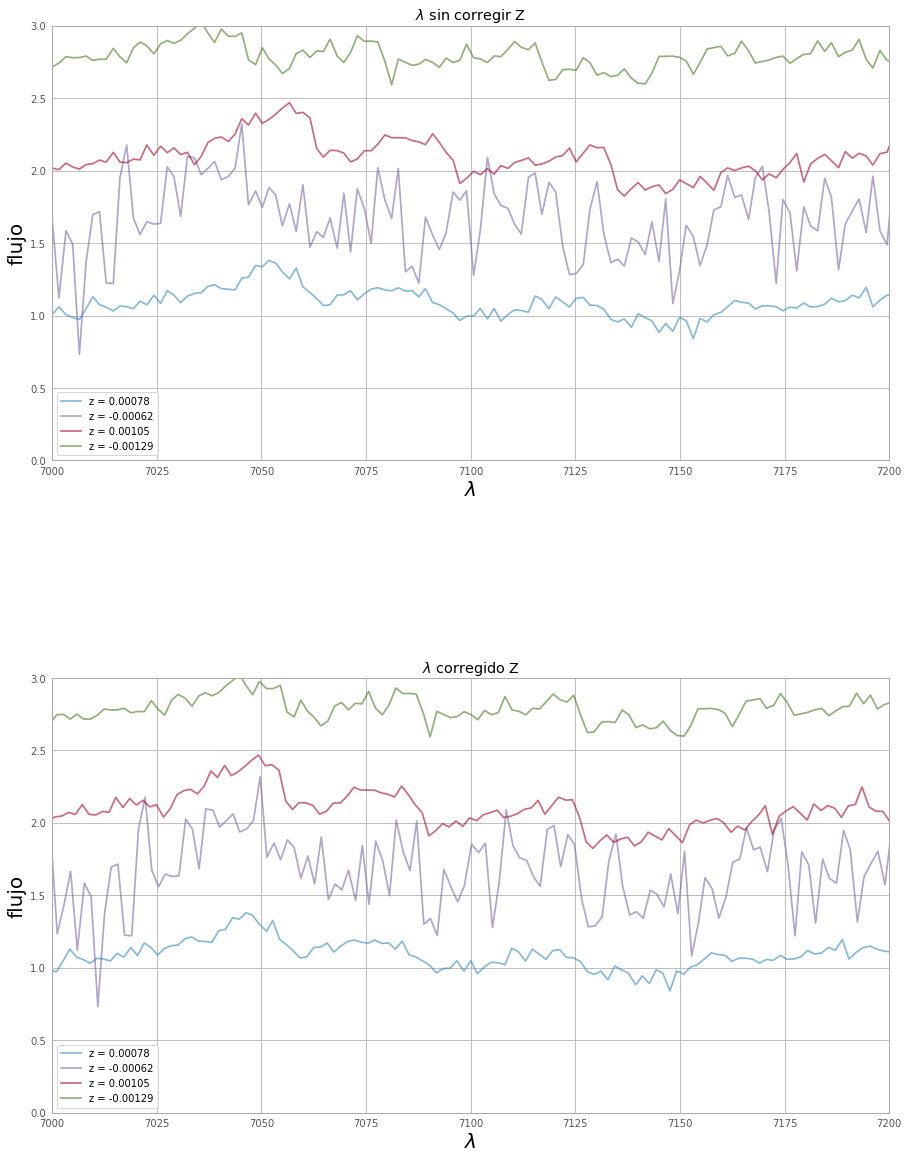

In [ ]:
ind = [0,1]
desp =1
alfa=0.6
fig, ax = plt.subplots(2, 1,figsize=(15,20))

for j, i in enumerate(ind):
  x = np.asarray(espectros_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_z_posit.loc[i]['flujo'])/np.asarray(espectros_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j #normalizamos a un intervalo por el ruido
  z = str(espectros_z_posit.loc[i]['Z'])[:7]
  ax[0].plot(x,y,alpha=alfa, label="z = "+z)

  x = np.asarray(espectros_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_z_negat.loc[i]['flujo'])/np.asarray(espectros_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.5)
  z = str(espectros_z_negat.loc[i]['Z'])[:8]
  ax[0].plot(x,y,alpha=alfa,label="z = "+z)

  x = np.asarray(espectros_corr_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_posit.loc[i]['flujo'])/np.asarray(espectros_corr_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j
  z = str(espectros_corr_z_posit.loc[i]['Z'])[:7]
  ax[1].plot(x,y,alpha=alfa,label="z = "+z)

  x = np.asarray(espectros_corr_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_negat.loc[i]['flujo'])/np.asarray(espectros_corr_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.5)
  z = str(espectros_corr_z_negat.loc[i]['Z'])[:8]
  ax[1].plot(x,y,alpha=alfa,label="z = "+z)


ax[0].set_xlabel('$\lambda$',size=20)
ax[0].set_ylabel('flujo',size = 20)
ax[0].set_title('$\lambda$ sin corregir Z')
ax[0].set_ylim(0,3)
ax[0].set_xlim(7000,7200)

ax[1].set_xlabel('$\lambda$',size=20)
ax[1].set_ylabel('flujo',size = 20)
ax[1].set_title('$\lambda$ corregido Z')
ax[1].set_ylim(0,3)
ax[1].set_xlim(7000,7200)

ax[0].legend()
ax[1].legend()


Vemos claramente que al corregir el corrimiento al rojo las características de los espectros pasan a coincidir para los mismos rangos de frecuencia. 

## Remuestreo de los espectros.

Para poder un análisis posterior interesa que los flujos vengan referidos a una misma base de longitudes de onda.

### Objetos SDSS

Descartamos dichos espectros que no tienen información para longitudes de onda menores de 8500.

In [ ]:
df_info_obj_espec_zcorr.columns

Index(['SPECOBJID', 'ra', 'dec', 'sn_median_r', 'zerr', 'nom_fichero_fit',
       'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID', 'Z', 'PLATEQUALITY',
       'CLASS', 'SUBCLASS', 'max_long_A', 'extrapolado'],
      dtype='object')

In [ ]:
index_long_menor_8500 = (df_info_obj_espec_zcorr['max_long_A']<8500)
df_obj_espectros = df_info_obj_espec_zcorr[~index_long_menor_8500]
print(f"Número de espectros original {df_info_obj_espec_zcorr.shape[0]}")
print(f"Número de espectros con rango inferior a 8500 {index_long_menor_8500.sum()}")
df_obj_espectros.shape[0]

Número de espectros original 3243
Número de espectros con rango inferior a 8500 1


3242

Definimos un conjunto de longitudes de onda sobre las que interpolaremos los flujos. Tenemos flujos para unas  3800 longitudes de onda en un rango entre los 3800 y 9200 Armstrong. Haremos un sobremuestreo con un paso de 0.5 Armstrong entre 5000 y 8500 haciendo interpolación lineal. 

In [ ]:
new_long = np.arange(5000+0.5, 8500, 0.5)
new_long.shape

(6999,)

In [ ]:
new_long

array([5000.5, 5001. , 5001.5, ..., 8498.5, 8499. , 8499.5])

Podemos inspeccionar gráficamente en algunos espectros la interpolación

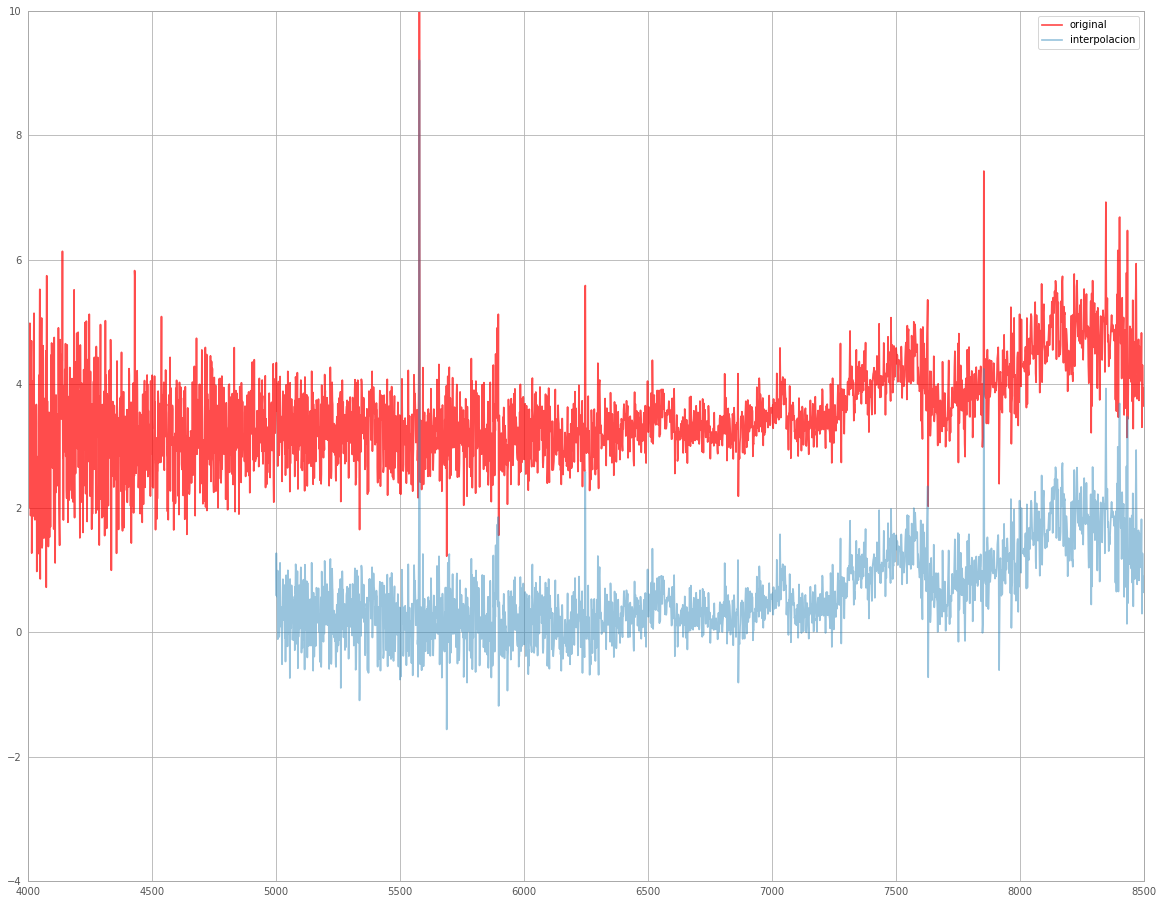

In [ ]:
indice=1000
x = df_obj_espectros.loc[indice]['long_A']
y = df_obj_espectros.loc[indice]['flujo']
f_inter = interpolate.interp1d(x, y)
new_flujo = f_inter(new_long)

plt.figure(figsize=(20,16))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8500)
plt.ylim(-4,10)
plt.legend()
plt.show()

Hacemos la interpolación para todos los espectros.

In [ ]:
def fun_extrapolar(X, new_x):
  #new_x = np.arange(5000, 8000.5, 0.5)
  f_inter = interpolate.interp1d(X[0], X[1])
  return  f_inter(new_x)



In [ ]:
df_obj_espectros_extrap = df_obj_espectros.copy()

In [ ]:
df_obj_espectros_extrap.flujo = df_obj_espectros_extrap[['long_A','flujo']].apply(fun_extrapolar, new_x = new_long, axis=1)  



Podemos inspeccionar graficamente los resultados.

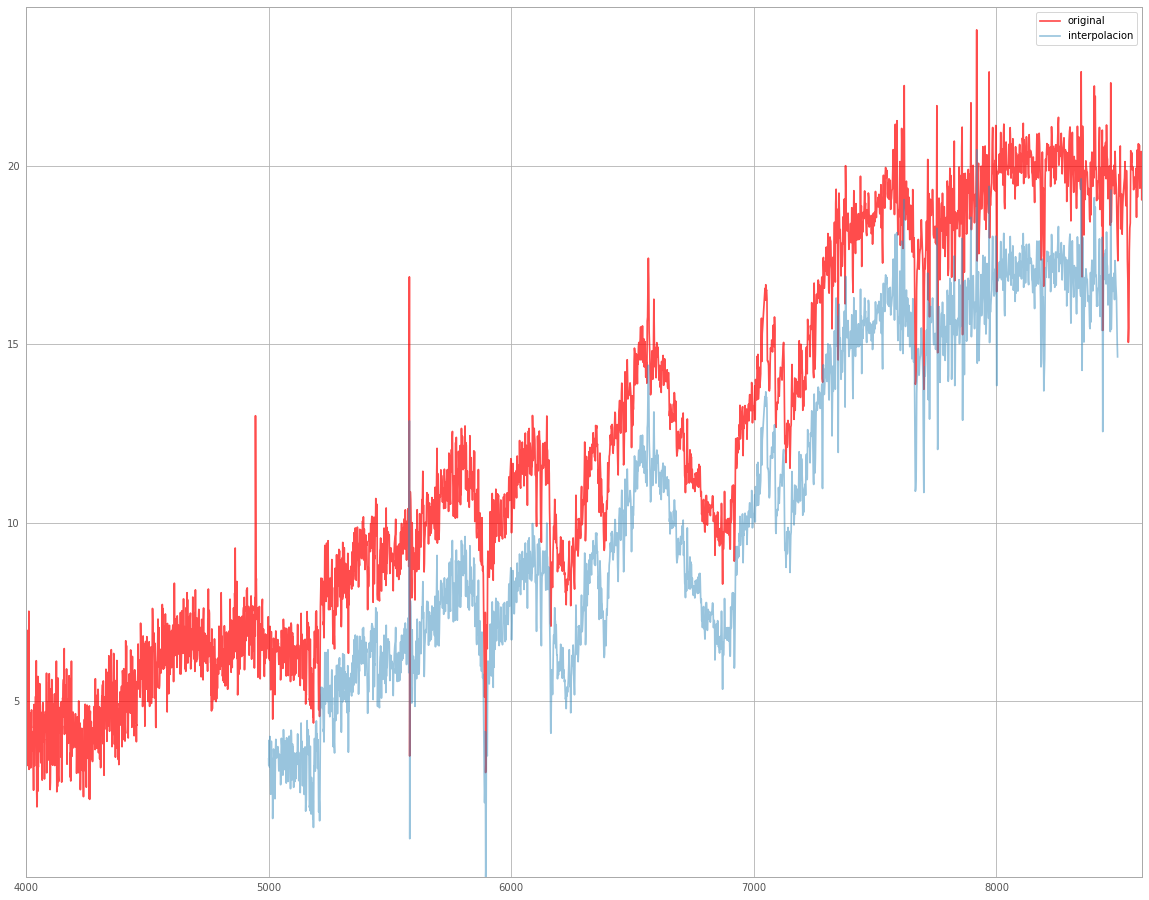

In [ ]:
indice =2500

new_flujo = df_obj_espectros_extrap.loc[indice,'flujo']
x = df_obj_espectros.loc[indice]['long_A']
y = df_obj_espectros.loc[indice]['flujo']

plt.figure(figsize=(20,16))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos  el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8600)
plt.ylim(new_flujo.min(),4+new_flujo.max())
plt.legend()
plt.show()

#### Guardado y carga de los espectros SDSS extrapolados.

Para ahorrar espacio guardaremos las longitudes de onda solo en el primer registro

In [ ]:
df_obj_espectros_extrap.long_A = [new_long]+ [0]*(df_obj_espectros_extrap.shape[0]-1) 

In [ ]:
df_obj_espectros_extrap.head(5)

,SPECOBJID,ra,dec,sn_median_r,zerr,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS,max_long_A,extrapolado
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000046,spec-0275-51910-0272.fits,"[0.1910378187499413, 0.38464163987497074, 0.57...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",275,51910,272,0.000039,good,STAR,M8,9187.6,False
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000023,spec-0275-51910-0337.fits,"[1.533884882950038, 1.2824903726999999, 1.2868...",0,275,51910,337,0.000567,good,STAR,M2V,9215.1,False
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,0.000028,spec-0277-51908-0496.fits,"[1.076908727483494, 0.546347568441747, 0.01578...",0,277,51908,496,-0.000035,good,STAR,M8,9215.1,False
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,0.000030,spec-0280-51612-0316.fits,"[3.626225392049899, 3.9600028594249497, 4.2937...",0,280,51612,316,-0.000032,good,STAR,M2,9185.4,False
4,316414459662854144,'11:27:53.83','-00:51:39.48',28.26,0.000010,spec-0281-51614-0133.fits,"[9.082636919908971, 9.287364006050373, 10.1079...",0,281,51614,133,0.000387,good,STAR,M0V,9191.8,False


In [ ]:
new_flujo.shape

(6999,)

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
import json


In [ ]:
directorio = 'BD_espectros_sample/'
df_obj_espectros_extrap.to_json(directorio+'datos_obj_espectros_extrapolados.json')

In [ ]:
df_ = df_obj_espectros_extrap.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'BD_espectros_sample/'
df_obj_espectros_extrap = pd.read_json(directorio+'datos_obj_espectros_extrapolados.json')


In [ ]:
df_obj_espectros_extrap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 3495
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPECOBJID        3242 non-null   int64  
 1   ra               3242 non-null   object 
 2   dec              3242 non-null   object 
 3   sn_median_r      3242 non-null   float64
 4   zerr             3242 non-null   float64
 5   nom_fichero_fit  3242 non-null   object 
 6   flujo            3242 non-null   object 
 7   long_A           3242 non-null   object 
 8   PLATE            3242 non-null   int64  
 9   MJD              3242 non-null   int64  
 10  FIBERID          3242 non-null   int64  
 11  Z                3242 non-null   float64
 12  PLATEQUALITY     3242 non-null   object 
 13  CLASS            3242 non-null   object 
 14  SUBCLASS         3242 non-null   object 
 15  max_long_A       3242 non-null   float64
 16  extrapolado      3242 non-null   bool   
dtypes: bool(1), fl

In [ ]:
df_obj_espectros_extrap

,SPECOBJID,ra,dec,sn_median_r,zerr,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS,max_long_A,extrapolado
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000046,spec-0275-51910-0272.fits,"[0.1910378187, 0.3846416399, 0.578245461000000...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",275,51910,272,0.000039,good,STAR,M8,9187.6,False
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000023,spec-0275-51910-0337.fits,"[1.533884883, 1.2824903726999999, 1.2868878544...",0,275,51910,337,0.000567,good,STAR,M2V,9215.1,False
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,0.000028,spec-0277-51908-0496.fits,"[1.0769087275, 0.5463475684, 0.0157864094, -0....",0,277,51908,496,-0.000035,good,STAR,M8,9215.1,False
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,0.000030,spec-0280-51612-0316.fits,"[3.6262253920000003, 3.9600028594000003, 4.293...",0,280,51612,316,-0.000032,good,STAR,M2,9185.4,False
4,316414459662854144,'11:27:53.83','-00:51:39.48',28.26,0.000010,spec-0281-51614-0133.fits,"[9.0826369199, 9.2873640061, 10.1079387665, 10...",0,281,51614,133,0.000387,good,STAR,M0V,9191.8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,3327057665879730176,'15:41:38.61','+00:54:17.24',2.15,0.000071,spec-2955-54562-0085.fits,"[0.4617551193, 0.3279235251, 0.194091931000000...",0,2955,54562,85,0.000099,good,STAR,M3,9191.8,False
3492,3327140953885534208,'15:37:03.16','+01:43:46.66',0.22,0.000063,spec-2955-54562-0388.fits,"[0.292153695, 0.1775735474, 0.0629933998, -0.0...",0,2955,54562,388,0.000085,good,STAR,M8,9215.1,False
3493,3328176143462328320,'09:56:35.70','+45:36:47.08',1.04,0.000114,spec-2956-54525-0058.fits,"[0.0956987465, -0.0160267266, -0.1277521998, -...",0,2956,54525,58,-0.000097,good,STAR,M5,9196.0,False
3494,3331593700680689664,'07:52:53.40','+30:32:31.78',7.05,0.000033,spec-2959-54537-0203.fits,"[1.3083184741, 1.080525886, 1.0135897994, 1.05...",0,2959,54537,203,0.000276,marginal,STAR,M0,9183.3,False


### Plantillas subenanas

In [ ]:
df_espec_platillas.columns

Index(['flujo', 'long_A', 'clase_metalicidad'], dtype='object')

##### Submuestreo plantillas

Submuestreamos según  la base definida de longitudes de onda.
Podemos usar la mediana o bien la media.

Usamos la mediana. Definimos la siguiente función.

In [ ]:
def submuestreo(flujos_lo, base_lo, anchura=1):
  """
  :param: flujos_lo lista dos elementos. [Lista o array con los flujos, longitudes de onda correspondientes]
  :param: anchura. rango de longitudes de onda en la que se calculará la mediana.
  :return: Flujos submuestreados a la nueva base base_lo
  """
  d=anchura/2
  lo=np.asarray(flujos_lo[1])
  flujos=np.asarray(flujos_lo[0])
  new_flujo = []
  for i in base_lo:
    indices = np.where((lo>=i-d)&(lo<i+d)) #intervalos agrupamiento.
    new_flujo.append(np.median(flujos[indices]))
  return np.asarray(new_flujo)


Podemos ver si funciona bien.

In [ ]:
espectro =15
x_p= df_espec_platillas.loc[espectro,'long_A']
y_p= df_espec_platillas.loc[espectro,'flujo']
new_flujo = submuestreo([y_p, x_p], new_long, 1)

In [ ]:
new_flujo.shape

(6999,)

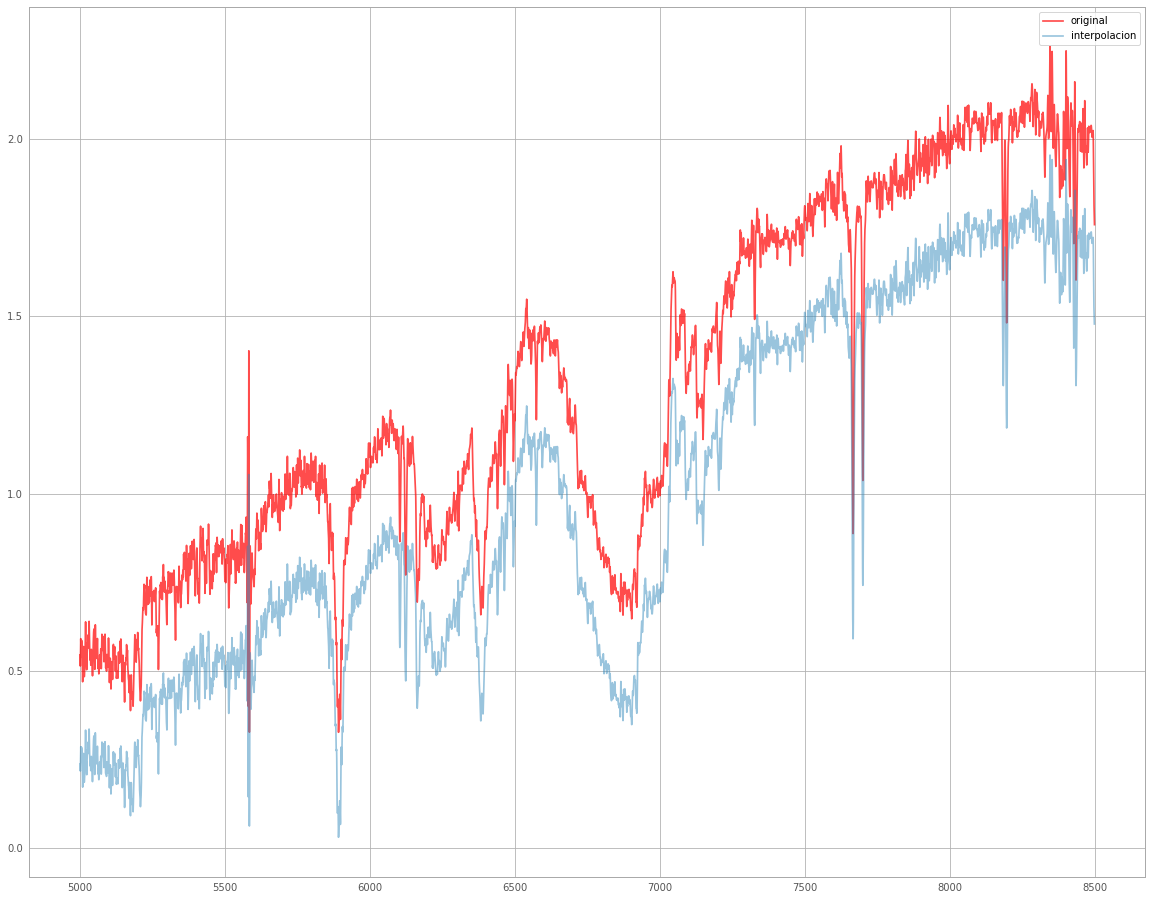

In [ ]:
plt.figure(figsize=(20,16))
plt.plot(x_p, [k+0.3 for k in y_p], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
#plt.ylim(-4,10)
plt.legend()
plt.show()

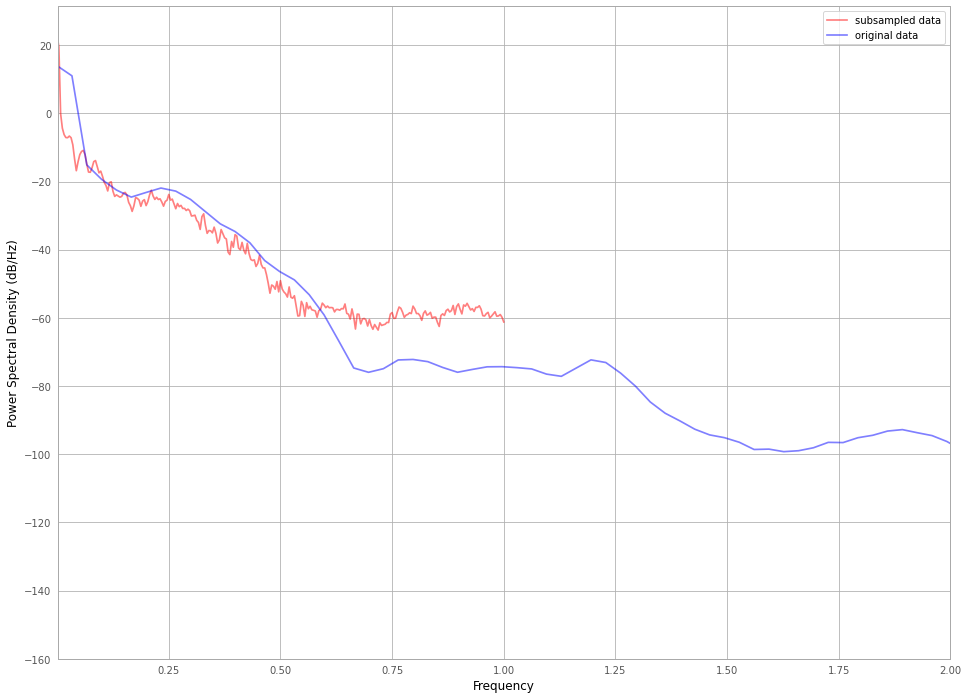

In [ ]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html

plt.figure(1,figsize=(16,12))

plt.psd(new_flujo, NFFT=512, Fs=2, label='subsampled data', color='red',alpha=0.5)
plt.psd(y_p, NFFT=512, Fs=int(len(x_p)/3500), label='original data', color='blue',alpha=0.5)
#plt.ylim(-5,20)
plt.xlim(0.001,2)
plt.legend()

Aplicamos el submuestreo a todas las plantillas.

In [ ]:
df_plantillas_submuestreo = df_espec_platillas.copy()
df_plantillas_submuestreo['flujo']=df_plantillas_submuestreo[['flujo','long_A']].apply(submuestreo, base_lo=new_long,axis=1)

In [ ]:
test = df_plantillas_submuestreo.copy()
test['long_A']=[new_long]*test.shape[0]
test.head(2)

Añadimos las nuevas longitudes de onda al dataset.

In [ ]:
df_plantillas_submuestreo['long_A']=[new_long]*test.shape[0]
df_plantillas_submuestreo.head(2)

,flujo,long_A,clase_metalicidad
0,"[0.37649570405, 0.3602712154, 0.35831096770000...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm0
1,"[0.351226598, 0.3483290672, 0.3552474678, 0.37...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm1


Comprobamos el resultado

In [ ]:
espectro =2
x_p= df_espec_platillas.loc[espectro,'long_A']
y_p= df_espec_platillas.loc[espectro,'flujo']
x= df_plantillas_submuestreo.loc[espectro,'long_A']
y= df_plantillas_submuestreo.loc[espectro,'flujo']

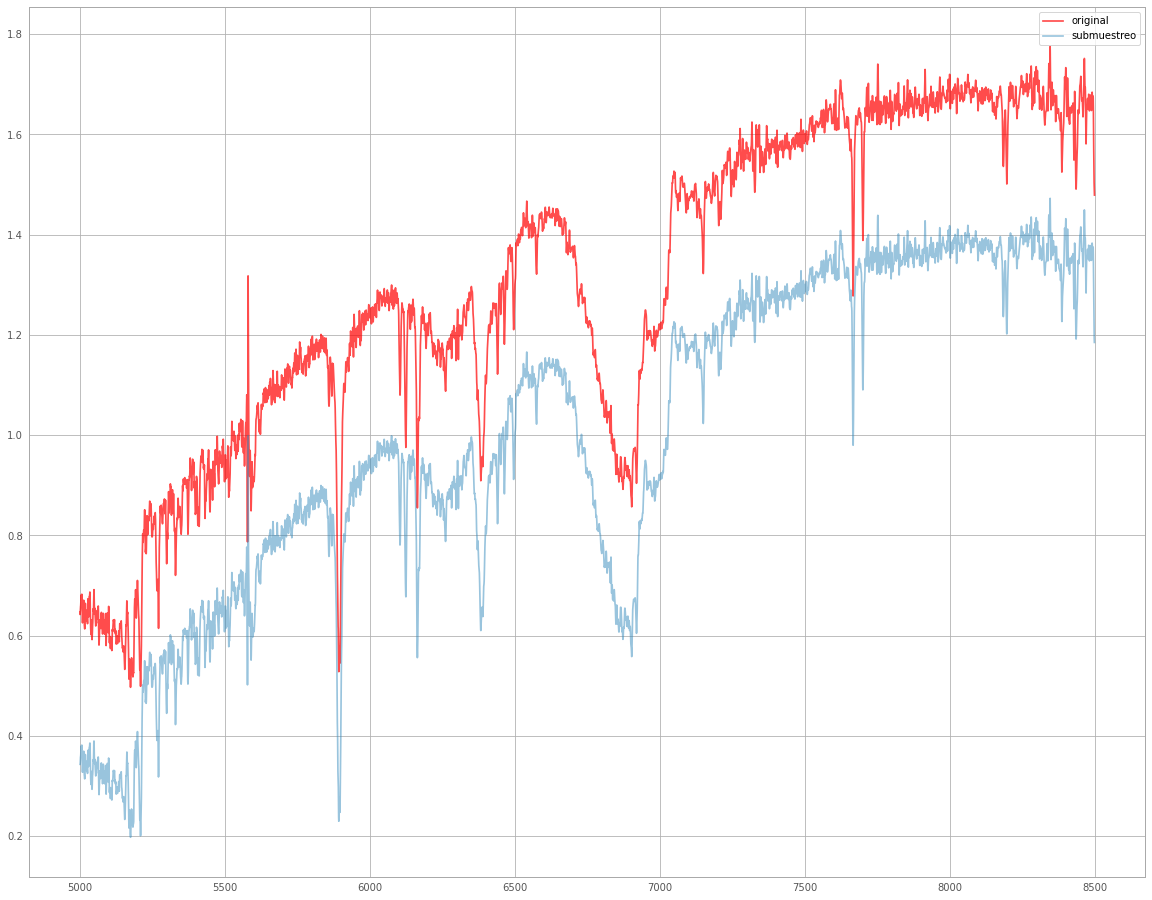

In [ ]:
plt.figure(figsize=(20,16))
plt.plot(x_p, [k+0.3 for k in y_p], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(x, y, label='submuestreo', alpha = 0.5)
#plt.ylim(-4,10)
plt.legend()
plt.show()

#### Guardado y carga de las plantillas submuestreadas

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
import json


In [ ]:
directorio = 'Plantillas/'
df_plantillas_submuestreo.to_json(directorio+'plantillas_submuestreadas.json')

In [ ]:
df_ = df_plantillas_submuestreo.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'Plantillas/'
df_plantillas_submuestreo = pd.read_json(directorio+'plantillas_submuestreadas.json')


In [ ]:
df_plantillas_submuestreo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   flujo              30 non-null     object
 1   long_A             30 non-null     object
 2   clase_metalicidad  30 non-null     object
dtypes: object(3)
memory usage: 960.0+ bytes


In [ ]:
df_plantillas_submuestreo

,flujo,long_A,clase_metalicidad
0,"[0.37649570400000004, 0.3602712154, 0.35831096...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm0
1,"[0.351226598, 0.3483290672, 0.3552474678, 0.37...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm1
2,"[0.3433917314, 0.34547248480000003, 0.35350087...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm2
3,"[0.3352071941, 0.33101749420000004, 0.31141155...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm3
4,"[0.2207939028, 0.2226050347, 0.268433243000000...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm4
5,"[0.2942835092, 0.2952315211, 0.2782124281, 0.2...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm5
6,"[0.2841973007, 0.24553741510000002, 0.17853984...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm6
7,"[0.1176004372, 0.1526668668, 0.2290173918, 0.2...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm7
8,"[0.067682527, 0.07485453040000001, 0.092857487...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm8
9,"[0.043269092200000005, 0.134839192, 0.17394469...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm9


## Filtrado de los espectros

Utilizaremos ondículas. Es importante que los flujos correspondan a longitudes de onda equiespaciadas. Eso lo hemos hecho cuando hemos definido una base estándar de longitudes de onda.

### Espectros Plantillas subenanas

In [ ]:
w_type='sym3'
#print(pywt.Wavelet(wavelet_type))

Tras diversas pruebas decompondremos hasta nivel 4 y eliminaremos los dos coeficientes de detalle más bajos. 

In [ ]:
'''
NO USADO

def filtrado_ondiculas(datos,ondicula, nivel, coef_a_anular,longitud):
  """
  Filtrado con ondículas.
  :param: tipo de ondícula
  :param: array de datos a filtrar.
  :param: nivel: nivel para la transformada
  :param:coef_a_anular: lista con los coeficientes de detalle a anular
  :param:tamaño de los datos a devolver
  :return: datos filtrados.
  """
  DWTcoeffs = pywt.wavedec(datos,ondicula,mode='sym', level=nivel, axis=-1)
  for coef_to_cero in coef_a_anular:
    DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])
    
  return pywt.waverec(DWTcoeffs,wavelet_type,mode='sym',axis=-1)[:longitud]
    #return np.asarray(y)[:longitud]

Definimos una función que nos filtrará usando ondículas y que nos eliminaré outliers de los flujos

In [ ]:
def filtrado_ondiculas(datos,ondicula, nivel, coef_a_anular,longitud,n_sigma=100):
  """
  Filtrado con ondículas.
  :param: tipo de ondícula
  :param: array de datos a filtrar.
  :param: nivel: nivel para la transformada
  :param:coef_a_anular: lista con los coeficientes de detalle a anular
  :param:tamaño de los datos a devolver
  :return: datos filtrados.
  """
  datos = np.asarray(datos)
  media = datos.mean()
  std = datos.std()
  def quitar_outliers(n_sigma,media,std):
    def suavizar(x):
      if x > media +n_sigma*std:
        x= media+std
      elif x<media-n_sigma*std:
        x=media-std
      return x
    return suavizar
  
  suavizado = quitar_outliers(n_sigma, media, std)
  datos = np.asarray(list(map(suavizado,datos)))

  DWTcoeffs = pywt.wavedec(datos,ondicula,mode='sym', level=nivel, axis=-1)
  for coef_to_cero in coef_a_anular:
    DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])
    
  return pywt.waverec(DWTcoeffs,ondicula,mode='sym',axis=-1)[:longitud]
    #return np.asarray(y)[:longitud]

Recuperamos las longitudes de onda.

In [ ]:
new_long = np.asarray(df_plantillas_submuestreo.iloc[0]['long_A'])
new_long.shape

(6999,)

In [ ]:
df_plantillas_filtradas = df_plantillas_submuestreo[['clase_metalicidad','flujo']]
df_plantillas_filtradas['flujo']=df_plantillas_filtradas['flujo'].apply(filtrado_ondiculas, ondicula= w_type, nivel=4, coef_a_anular=[3,4],longitud=new_long.shape[0], n_sigma=5)


In [ ]:
df_plantillas_filtradas

,clase_metalicidad,flujo
0,usdm0,"[0.36937290911573306, 0.3657299230841083, 0.36..."
1,usdm1,"[0.3504768158235939, 0.3583199216274638, 0.364..."
2,usdm2,"[0.3450847730661994, 0.3491602748798056, 0.352..."
3,usdm3,"[0.3313812339836422, 0.31230564372329933, 0.29..."
4,usdm4,"[0.22554503739419518, 0.25222602833446545, 0.2..."
5,usdm5,"[0.29289193764217397, 0.2804143837260442, 0.27..."
6,usdm6,"[0.263619666978528, 0.24439815348644026, 0.234..."
7,usdm7,"[0.13893417083708642, 0.18193420633136775, 0.2..."
8,usdm8,"[0.07273671871552369, 0.09015706897207049, 0.1..."
9,usdm9,"[0.08255518266231907, 0.10237837838879708, 0.1..."


Calculamos el error cuadrático medio. $\frac{SSE}{n}$.

In [ ]:
SSE_medio=[]
for i in range(0,df_plantillas_submuestreo.shape[0]):
  SSE_medio.append((np.asarray(df_plantillas_submuestreo.loc[i]['flujo']-df_plantillas_filtradas.loc[i]['flujo'])**2).sum()/new_long.shape[0])


In [ ]:
maximo=max(SSE_medio)
maximo

0.005059731100406954

In [ ]:
np.where(np.asarray(SSE_medio)==maximo)

(array([28]),)

Visualizamos

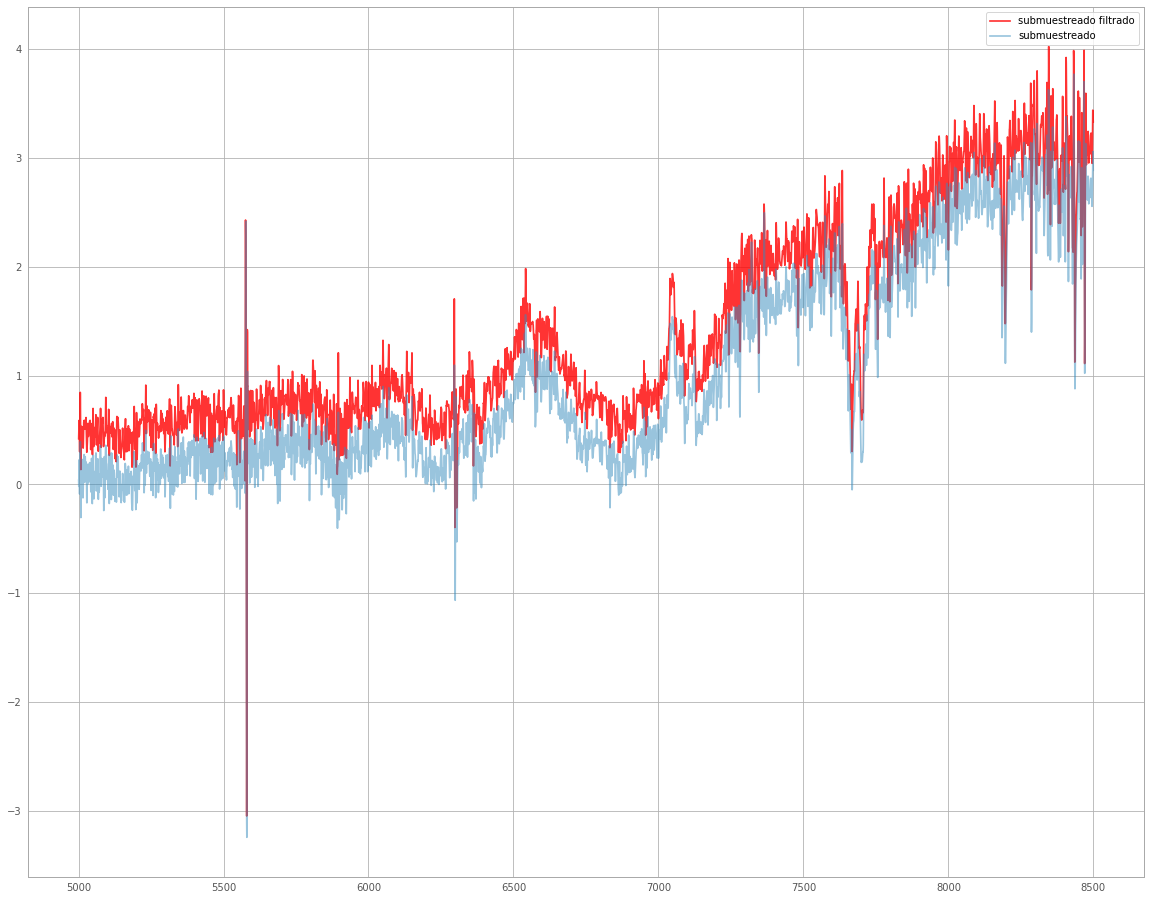

In [ ]:
indice =28

y_ = df_plantillas_submuestreo.loc[indice,'flujo']
x = new_long
y = df_plantillas_filtradas.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y+0.4, color='r', label = 'submuestreado filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='submuestreado', alpha = 0.5)
#plt.xlim(6500,6800)
#plt.ylim(0,2)
plt.legend()
plt.show()

### Espectros DB SDSS

Aplicamos los mismos parámetros para filtrar

In [ ]:
df_espectros_filtrados_sd = df_obj_espectros_extrap[['SPECOBJID','flujo']]
df_espectros_filtrados_sd['flujo']=df_espectros_filtrados_sd['flujo'].apply(filtrado_ondiculas, ondicula= 'sym3', nivel=4, coef_a_anular=[3,4],longitud=new_long.shape[0], n_sigma=5)


In [ ]:
df_espectros_filtrados_sd

,SPECOBJID,flujo
0,309697273216919552,"[0.28497893518348216, 0.4373650039998747, 0.54..."
1,309715140280870912,"[1.425748431789193, 1.3666800880420722, 1.3284..."
2,312010645648205824,"[0.8067250107277744, 0.3630967319389001, 0.032..."
3,315338862379427840,"[3.8112929862497906, 3.726317768111952, 3.6167..."
4,316414459662854144,"[9.238093611584656, 9.706727341361544, 10.0507..."
...,...,...
3491,3327057665879730176,"[0.3911404896976403, 0.3640662140985256, 0.354..."
3492,3327140953885534208,"[0.23688837278911523, 0.14788174893007572, 0.0..."
3493,3328176143462328320,"[0.04097587231954237, -0.022287899655607412, -..."
3494,3331593700680689664,"[1.2086251148060276, 1.142697224730654, 1.1010..."


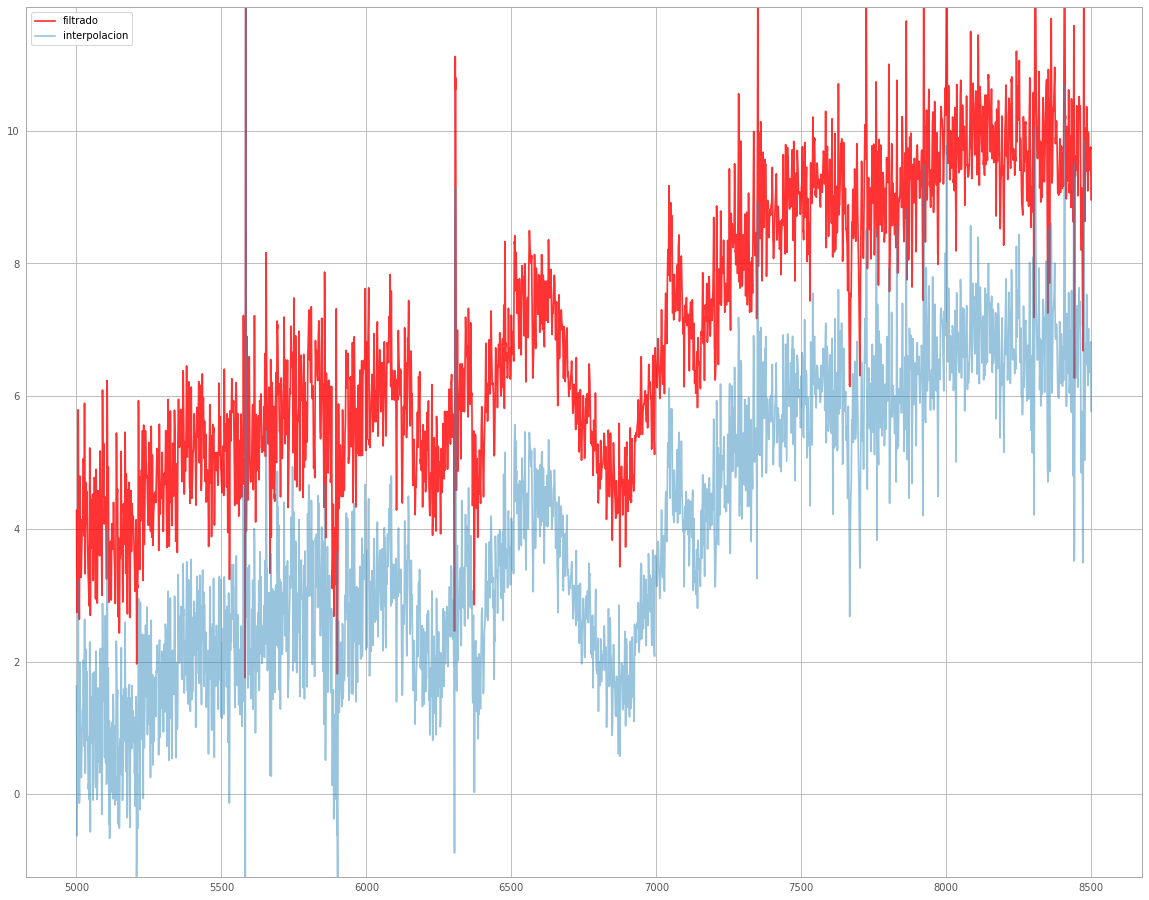

In [ ]:
indice =300

y_ = df_obj_espectros_extrap.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_sd.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y+3, color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='interpolacion', alpha = 0.5)
#plt.xlim(7475,7525)
plt.ylim(min(y),max(y))
plt.legend()
plt.show()

## Normalización de los espectros subenanas SDSS

Los espectros de las plantillas están normalizados respecto al flujo a 7500 Armstrong. Haremos la normalización usando la mediana del intervalo 7475 y 7525.

In [ ]:
def normalizacion(espectro ,rang_lo, lo_norm, delta):
  """
  Función: Normaliza el espectro dividiendo por un flujo de normalización

  :param: espectro_[0] flujo del espectro a normalizar
  :param: rang_lo longitudes de onda correspondientes.
  :param: lo_norm: logitud de onda cuyo flujo se tomará como referencia.
  :param: delta: El flujo para normalizar se calculará como la mediana de los flujos en el intervalo [lo_norm-delta, lo_norm+delta]
  :RETURN: flujo normalizado
  """
  espectro = np.asarray(espectro)
  rang_lo = np.asarray(rang_lo)

  rango = np.where((rang_lo>=lo_norm-delta)&(rang_lo<=lo_norm+delta))
  mediana = np.median(espectro[rango])
  return espectro/mediana



In [ ]:
df_espectros_normalizados_sd = df_espectros_filtrados_sd.copy()
df_espectros_normalizados_sd['flujo']=df_espectros_normalizados_sd['flujo'].apply(normalizacion,rang_lo=new_long, lo_norm=7500, delta=25)
df_espectros_normalizados_sd.head(3)

,SPECOBJID,flujo
0,309697273216919552,"[0.11763463889587299, 0.1805371133066097, 0.22..."
1,309715140280870912,"[0.1188761122016826, 0.11395110937349184, 0.11..."
2,312010645648205824,"[0.308658911363061, 0.13892347517358009, 0.012..."


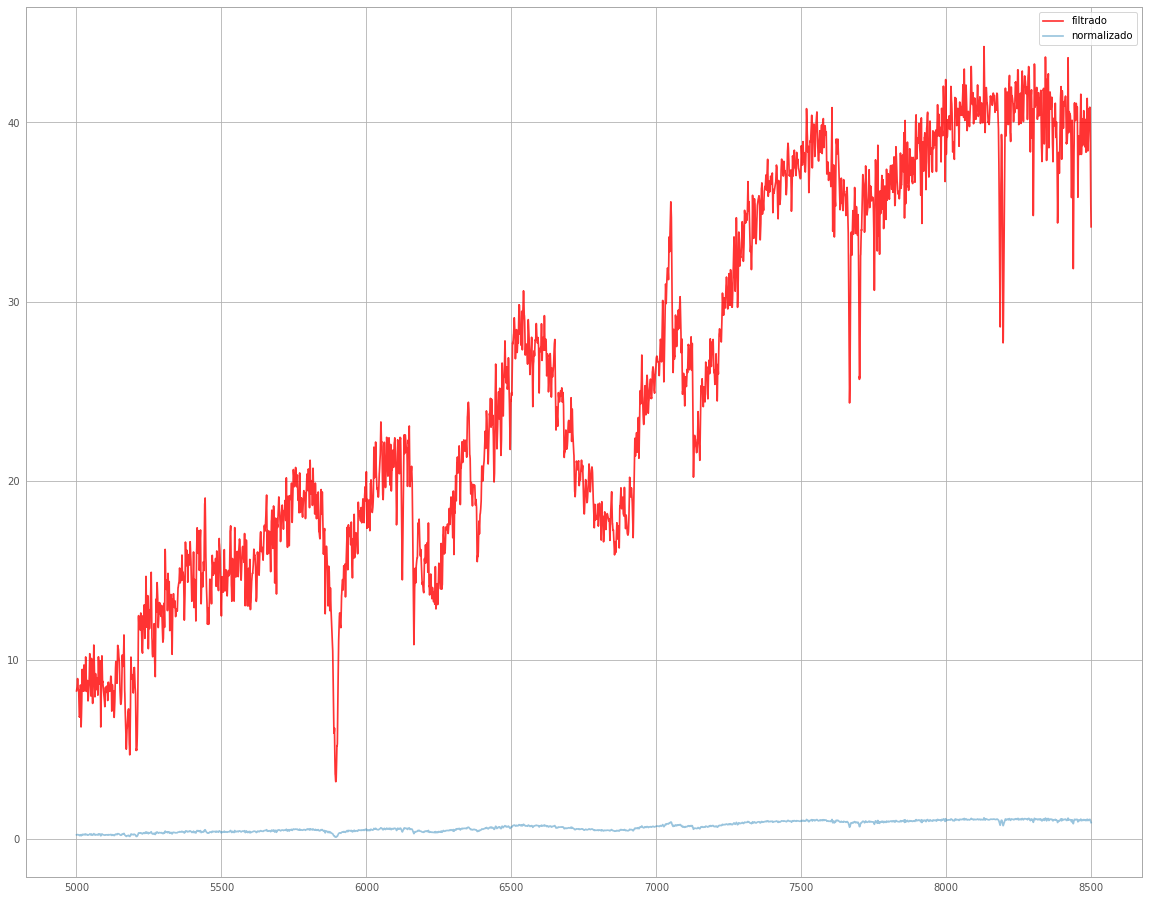

In [ ]:
indice =2000

y_ = df_espectros_normalizados_sd.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_sd.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

#### Guardado y carga de los espectros SDSS extrapolados.

In [ ]:
import json


In [ ]:
directorio = 'BD_espectros_sample/'
df_espectros_normalizados_sd.to_json(directorio+'datos_obj_espectros_normalizados.json')

In [ ]:
df_ = df_espectros_normalizados_sd.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'BD_espectros_sample/'
df_obj_espectros_normalizados = pd.read_json(directorio+'datos_obj_espectros_normalizados.json')


In [ ]:
df_obj_espectros_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 3495
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SPECOBJID  3242 non-null   int64 
 1   flujo      3242 non-null   object
dtypes: int64(1), object(1)
memory usage: 76.0+ KB


In [ ]:
df_obj_espectros_normalizados

,SPECOBJID,flujo
0,309697273216919552,"[0.1176346389, 0.1805371133, 0.2270124358, 0.2..."
1,309715140280870912,"[0.11887611220000001, 0.1139511094, 0.11076295..."
2,312010645648205824,"[0.3086589114, 0.1389234752, 0.0125316991, -0...."
3,315338862379427840,"[0.393436379, 0.3846644629, 0.3733577375, 0.36..."
4,316414459662854144,"[0.25669336330000003, 0.2697150075, 0.27927518..."
...,...,...
3491,3327057665879730176,"[0.1913975071, 0.1781492012, 0.1735489527, 0.1..."
3492,3327140953885534208,"[0.2808017564, 0.1752954539, 0.0987055522, -0...."
3493,3328176143462328320,"[0.0479995755, -0.0261082843, -0.0771934572000..."
3494,3331593700680689664,"[0.3363313495, 0.3179852007, 0.306381984500000..."


#Submuestreo espectros

Como última parte con el fin de trabajar con menos datos vamos a submuestrear. En un primer intento nos quedaremos con 1000 muestras por espectro. Teníamos 6999 muestras en cada espectro. Repetiremos la última para tener 7000. Cada 7 muestras de onda calularemos la mediana para asignar el valor correspondiente a la longitud de onda del espectro submuestreado.

In [ ]:
#Recortamos la lista para que la primera longitud de onda sea la central del primer intervalor
sub_long_1 = new_long[3:]
print(sub_long_1[0])
new_long[0:5]

5002.0


array([5000.5, 5001. , 5001.5, 5002. , 5002.5])

In [ ]:
#Seleccionamos cada 7.
sub_long=sub_long_1[::7]
print(sub_long.shape)
sub_long[:5] #nuevas longitudes de onda

(1000,)


array([5002. , 5005.5, 5009. , 5012.5, 5016. ])

## Muestra subenanas SDSS

Necesitamos 7000 valores del flujo por espectro pero solo tenemos 6999. Repetiremos el último.

In [ ]:
flujos_inc = list(map(lambda x: np.asarray(list(x)+[x[-1]]),df_espectros_normalizados_sd['flujo']))
flujos_inc[0].shape

(7000,)

In [ ]:
df_espectros_normalizados_sd['flujo'][0].shape

(6999,)

Definimos la función para submuestrear.

In [ ]:
def fun_submuestreo(flujos,intervalo = 7,n_new_flujos=1000):
  """
  :param: flujos. 
  :param: intervalor. tamaño del intervalo sobre el que se calculará la mediana
  :return: array con 1000 valores para el flujo submuestreado. Mediana de cada intervalo de 7 flujos
  """
  new=np.empty((1,n_new_flujos))
  for i in range(intervalo):
    new=np.concatenate((new,flujos[::intervalo].reshape(-1,n_new_flujos)),axis=0)
  return np.median(new[1:,:],axis=0)

La probamos

In [ ]:
test = fun_submuestreo(flujos_inc[0])

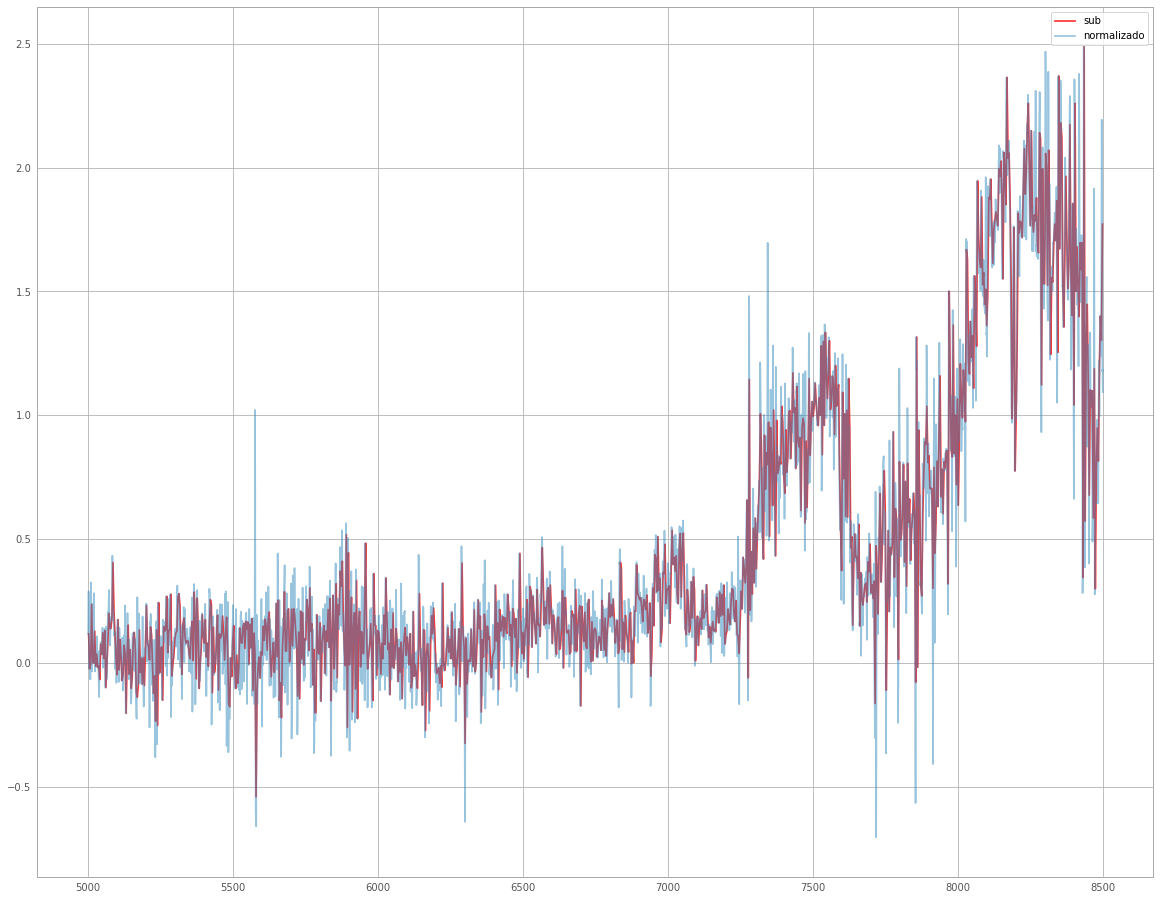

In [ ]:
indice =0

y_ = df_espectros_normalizados_sd.iloc[indice]['flujo']
x_ = new_long
y = test
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

La aplicamos a todos los espectros

In [ ]:
flujos_sub_em = np.asarray(list(map(fun_submuestreo,flujos_inc)))
flujos_sub_em.shape

(3242, 1000)

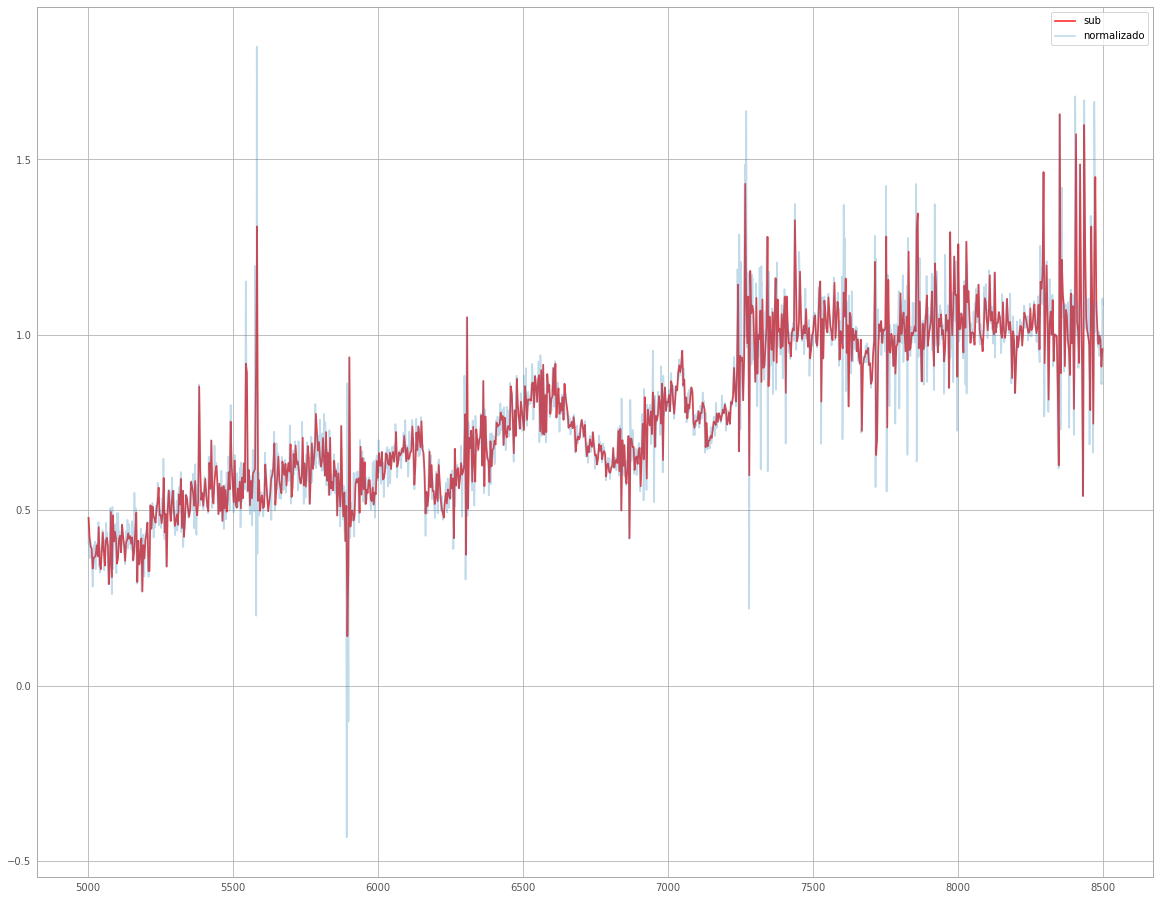

In [ ]:
indice =11

y_ = df_espectros_normalizados_sd.iloc[indice]['flujo']
x_ = new_long
y = flujos_sub_em[indice]
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.3)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

#### Guardado datos limpiados y filtrados de la muestra de subenanas.

La siguiente fase será ya clustering. Vamos a guardar la matriz con los flujos por un lado y el de las longitudes de onda por otro. Así mismo guardaremos el resto de la información de las subenanas en csv.

In [ ]:
print(flujos_sub_em.shape)
df_obj_espectros_extrap.shape

(3242, 1000)


(3242, 17)

In [ ]:
df_info_subenanas = df_obj_espectros_extrap.drop(columns= ['flujo', 'long_A','max_long_A', 'extrapolado'],inplace=False)
df_info_subenanas

,SPECOBJID,ra,dec,sn_median_r,zerr,nom_fichero_fit,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000046,spec-0275-51910-0272.fits,275,51910,272,0.000039,good,STAR,M8
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000023,spec-0275-51910-0337.fits,275,51910,337,0.000567,good,STAR,M2V
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,0.000028,spec-0277-51908-0496.fits,277,51908,496,-0.000035,good,STAR,M8
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,0.000030,spec-0280-51612-0316.fits,280,51612,316,-0.000032,good,STAR,M2
4,316414459662854144,'11:27:53.83','-00:51:39.48',28.26,0.000010,spec-0281-51614-0133.fits,281,51614,133,0.000387,good,STAR,M0V
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,3327057665879730176,'15:41:38.61','+00:54:17.24',2.15,0.000071,spec-2955-54562-0085.fits,2955,54562,85,0.000099,good,STAR,M3
3492,3327140953885534208,'15:37:03.16','+01:43:46.66',0.22,0.000063,spec-2955-54562-0388.fits,2955,54562,388,0.000085,good,STAR,M8
3493,3328176143462328320,'09:56:35.70','+45:36:47.08',1.04,0.000114,spec-2956-54525-0058.fits,2956,54525,58,-0.000097,good,STAR,M5
3494,3331593700680689664,'07:52:53.40','+30:32:31.78',7.05,0.000033,spec-2959-54537-0203.fits,2959,54537,203,0.000276,marginal,STAR,M0


Guardaremos en solo fichero las subclases, las longitudes de onda y los flujos.

In [ ]:
subclases=np.asarray(df_info_subenanas['SUBCLASS'])

In [ ]:
directorio = 'BD_espectros_sample/'
df_info_subenanas.to_csv(directorio+"info_muestra_tratada_EM.csv")
np.savez_compressed(directorio+'muestra_BD_tratada.npz', 
                    flujos=flujos_sub_em,
                    long_onda=sub_long,
                    subclases=subclases)

Comprobamos que se leen correctamente.

In [ ]:
directorio = 'BD_espectros_sample/'
muestra_BD = np.load(directorio+'muestra_BD_tratada.npz',allow_pickle=True)
muestra_BD.files


['flujos', 'long_onda', 'subclases']

In [ ]:
flujos_BD, long_onda, subclases = [muestra_BD[f] for f in muestra_BD.files]

In [ ]:
del muestra_BD

In [ ]:
flujos_BD.shape

(3242, 1000)

In [ ]:
long_onda.shape

(1000,)

In [ ]:
subclases.shape

(3242,)

## Plantillas subenanas

Repetiremos lo realizado para los espectros de la muestra.

In [ ]:
flujos_inc_p = list(map(lambda x: np.asarray(list(x)+[x[-1]]),df_plantillas_filtradas['flujo']))
flujos_inc_p[0].shape

(7000,)

La aplicamos a todas las plantillas

In [ ]:
flujos_sub_plantillas = np.asarray(list(map(fun_submuestreo,flujos_inc_p)))
flujos_sub_plantillas.shape

(30, 1000)

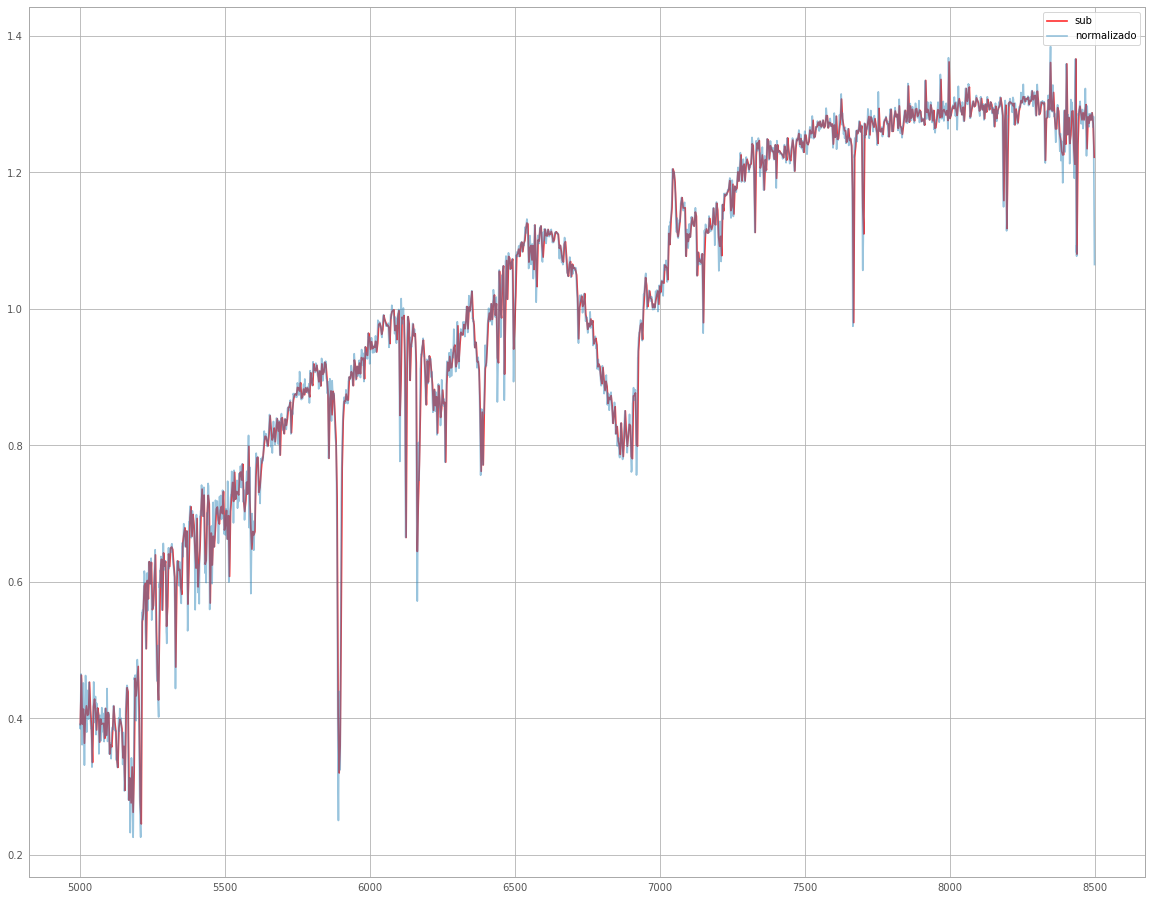

In [ ]:
indice =10

y_ = df_plantillas_filtradas.iloc[indice]['flujo']
x_ = new_long
y = flujos_sub_plantillas[indice]
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

#### Guardado espectros tratados plantillas

Guardamos las subclases de metalicidad, las longitudes de onda y los flujos en el mismo fichero. 

In [ ]:
df_plantillas_filtradas.columns

Index(['clase_metalicidad', 'flujo'], dtype='object')

In [ ]:
subclases_m=np.asarray(df_plantillas_filtradas['clase_metalicidad'])

In [ ]:
directorio = 'Plantillas/'
np.savez_compressed(directorio+'plantillas_tratadas.npz', 
                    flujos_p=flujos_sub_plantillas,
                    long_onda=sub_long,
                    subclases_m=subclases_m)

Comprobamos que se leen correctamente.

In [ ]:
directorio = 'Plantillas/'
datos_plantillas = np.load(directorio+'plantillas_tratadas.npz',allow_pickle=True)
datos_plantillas.files


['flujos_p', 'long_onda', 'subclases_m']

In [ ]:
flujos_p, long_onda, subclases_m = [datos_plantillas[f] for f in datos_plantillas.files]


In [ ]:
del datos_plantillas

In [ ]:
flujos_p

array([[ 0.36937291,  0.4654053 ,  0.40164489, ...,  1.26806182,
         1.25146527,  1.20145477],
       [ 0.35047682,  0.43782975,  0.38932483, ...,  1.2600871 ,
         1.31416186,  1.22703257],
       [ 0.34508477,  0.37606868,  0.35521875, ...,  1.35267167,
         1.3707838 ,  1.29845733],
       ...,
       [ 0.2365547 ,  0.25811722,  0.13255248, ...,  2.31783716,
         2.32090285,  2.08910103],
       [ 0.02049944, -0.10011209, -0.04404688, ...,  2.79995336,
         2.69744961,  2.75671007],
       [ 0.05941599,  0.10887124,  0.11102714, ...,  2.5247693 ,
         3.371379  ,  2.79322228]])

In [ ]:
longitudes_onda.shape

(1000,)

In [ ]:
subclases_m

array(['usdm0', 'usdm1', 'usdm2', 'usdm3', 'usdm4', 'usdm5', 'usdm6',
       'usdm7', 'usdm8', 'usdm9', 'esdm0', 'esdm1', 'esdm2', 'esdm3',
       'esdm4', 'esdm5', 'esdm6', 'esdm7', 'esdm8', 'esdm9', 'sdm0',
       'sdm1', 'sdm2', 'sdm3', 'sdm4', 'sdm5', 'sdm6', 'sdm7', 'sdm8',
       'sdm9'], dtype=object)

In [ ]:
flujos_p.shape

(30, 1000)

# Final